<a href="https://colab.research.google.com/github/Vishesh-Alag/DataDriven_Customer_Segmentation_and_Behaviour_Analysis_for_Marketing_Optimization/blob/main/DataDriven_Customer_Segmentation_and_Behaviour_Analysis_for_Marketing_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-Driven Customer Segmentation and Behaviour Analysis for Marketing Optimization

**TO RUN THIS FILE, PLEASE CREATE A COPY OF THIS COLAB FILE.**

**AND UPLOAD THE superstoremarketingdata.csv file.  IT'S LINK** - https://drive.google.com/file/d/14H7tRcIIyVDKaWLQyYPf2SZvV3k5xQHM/view?usp=sharing  

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

               Age  Customer_Tenure     children    Is_Parent  Total_Spent
count  1321.000000      1321.000000  1321.000000  1321.000000  1321.000000
mean     56.152914        11.959879     0.941711     0.713096   596.941711
std      11.630456         0.683614     0.744938     0.452488   600.421932
min      29.000000        11.000000     0.000000     0.000000     5.000000
25%      48.000000        11.000000     0.000000     0.000000    67.000000
50%      55.000000        12.000000     1.000000     1.000000   361.000000
75%      66.000000        12.000000     1.000000     1.000000  1034.000000
max      84.000000        13.000000     3.000000     1.000000  2525.000000

 Age Descriptive Statistics : 
count    1321.000000
mean       56.152914
std        11.630456
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        84.000000
Name: Age, dtype: float64 

Variance of Age: 135.27
Standard Deviation of Age: 11.63
Median of Age: 55.0
Mode of Age: 54


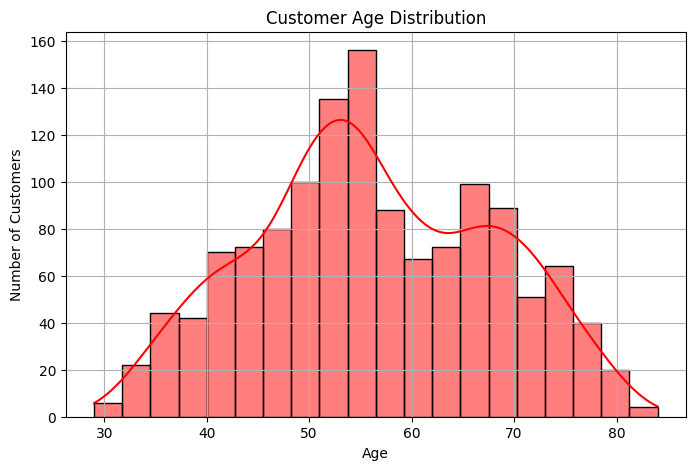

/tmp/ipython-input-1-1852017206.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


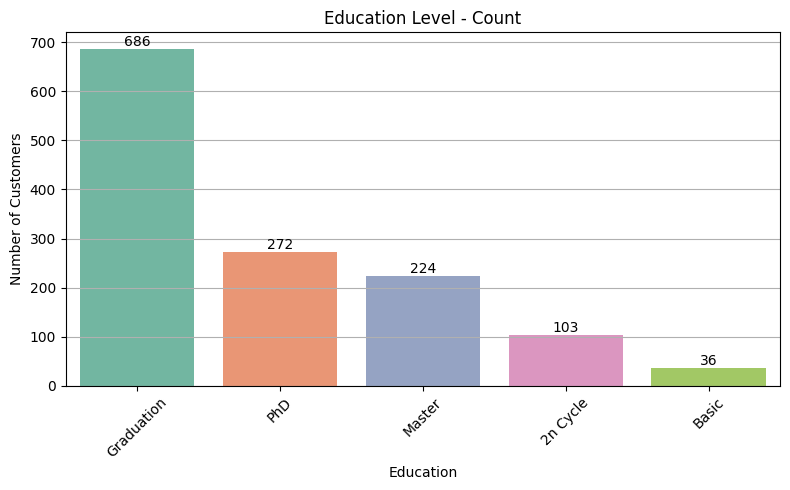

/tmp/ipython-input-1-1852017206.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


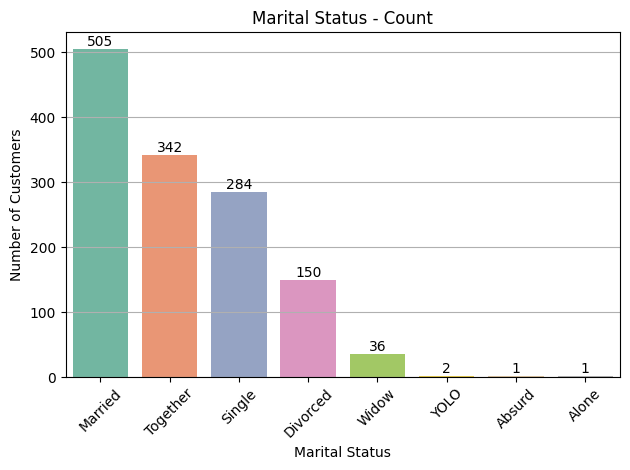

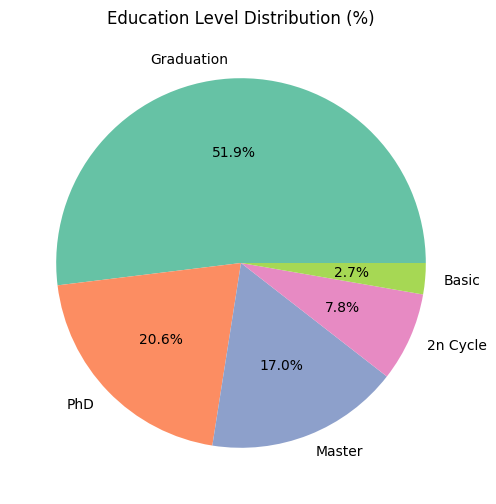

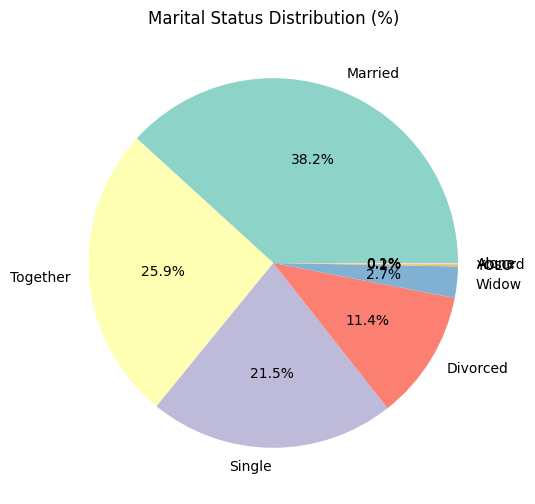

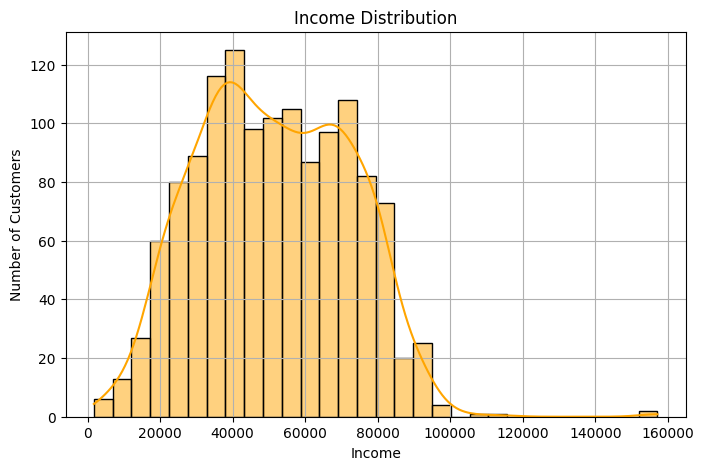

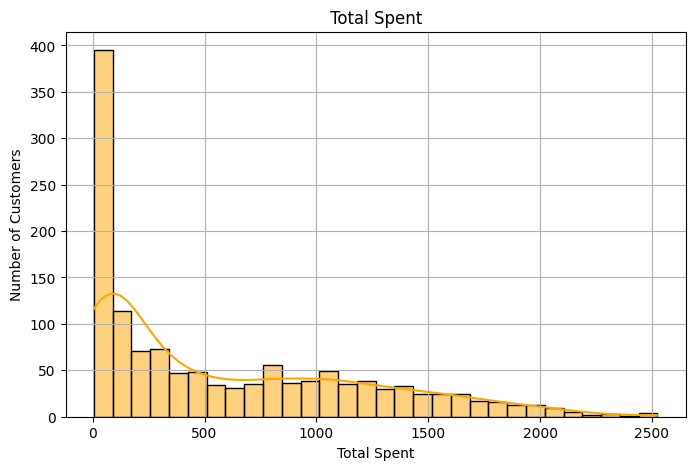

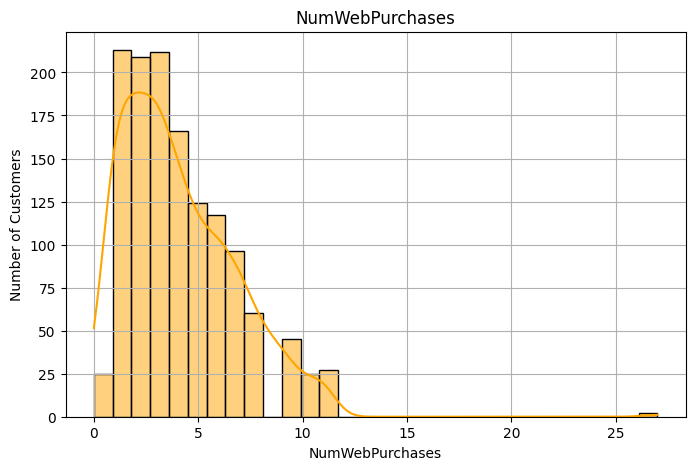

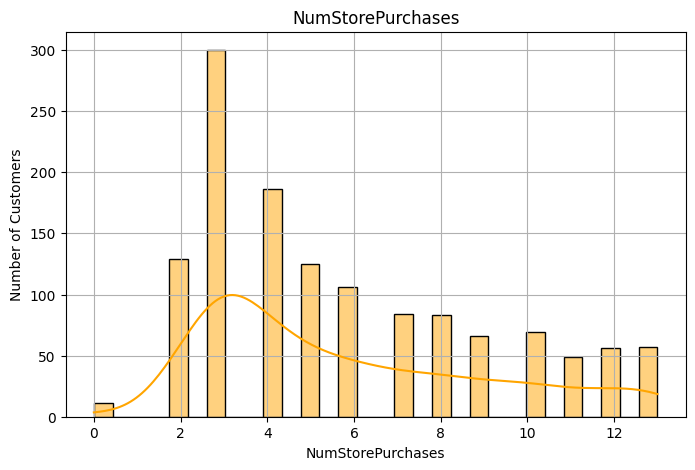

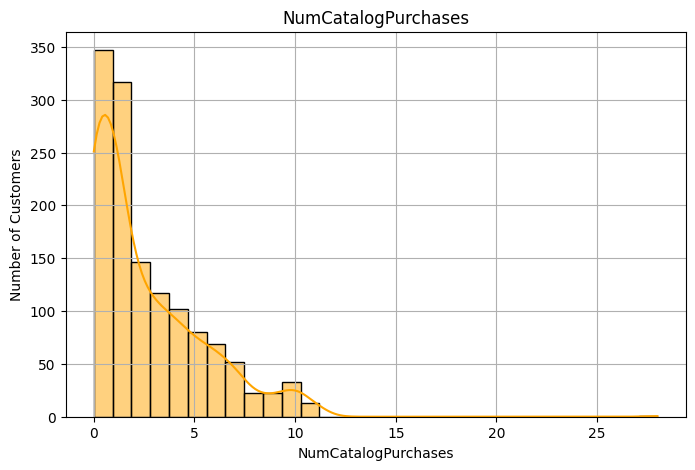

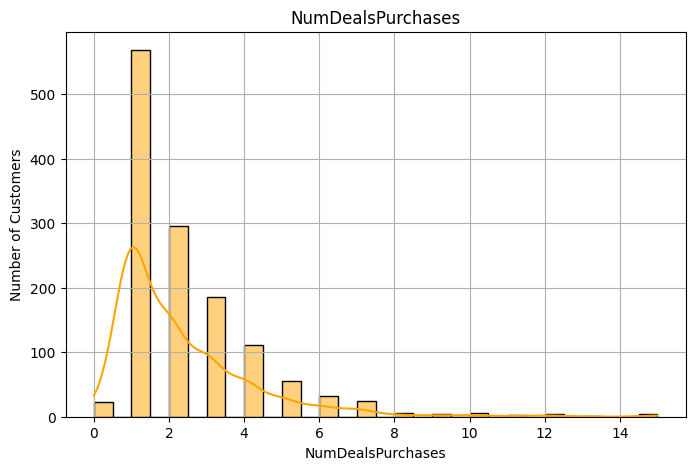

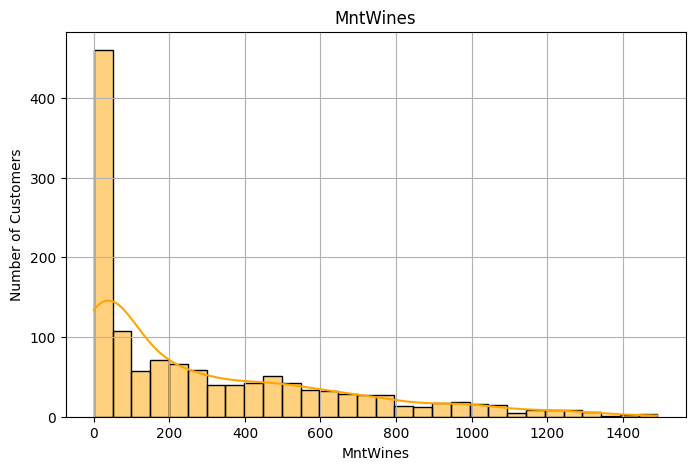

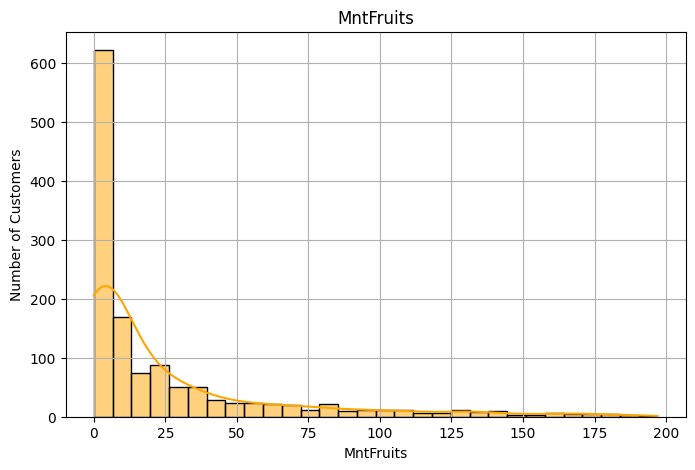

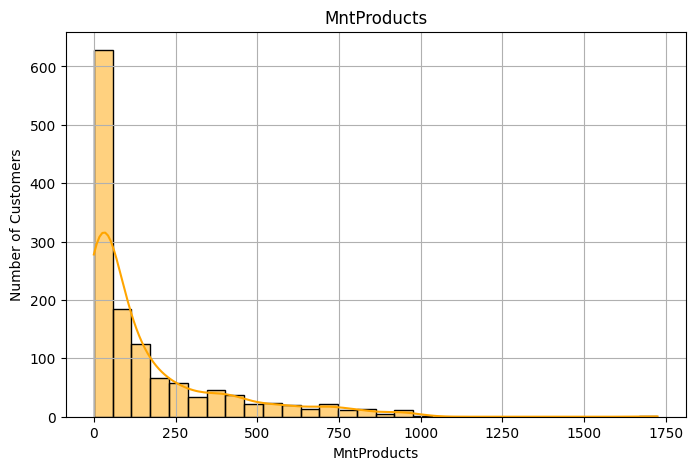

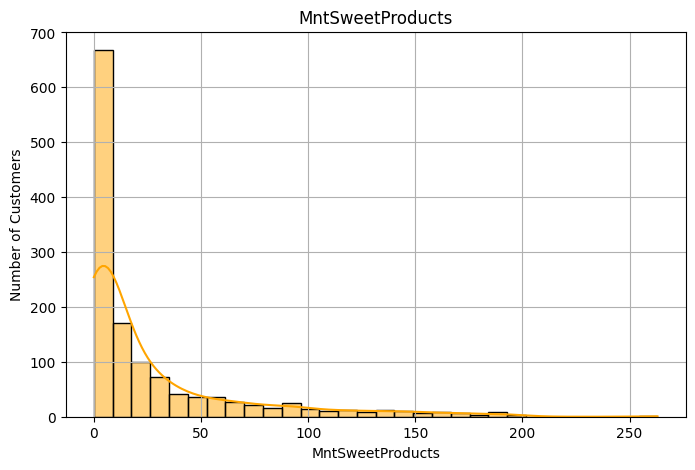

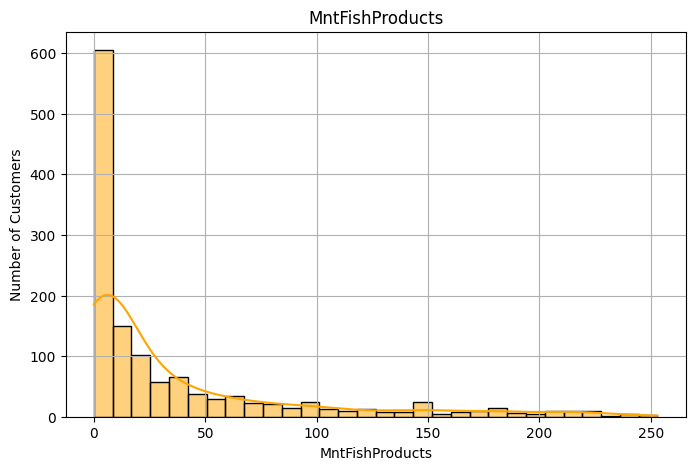

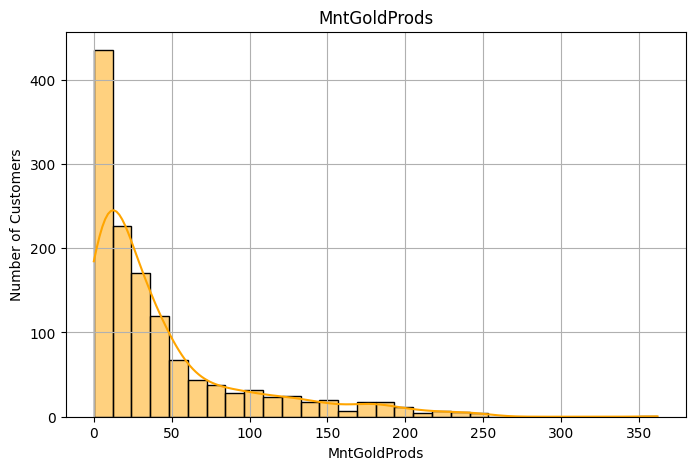

In [ ]:
# step 1 - Import Libraries and Load Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load dataset
df = pd.read_csv("superstoremarketingdata.csv")
# Show top rows
#print(df.head())

# Step 2: Check for Missing Values

missing = df.isnull().sum()

#print("Missing Values:\n", missing[missing > 0])

# income has missing values (24)
'''Handling:
    For Income: Use median imputation (robust to outliers)'''

df['Income'] = df['Income'].fillna(df['Income'].median())

# checking if income has still nulls
missing1 = df.isnull().sum()
#print(missing1)

# Dt_Customer has ##### values also.
# Handle date parsing and remove rows with completely invalid dates (if any)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df = df.dropna(subset=['Dt_Customer']).copy() # Remove rows where date could not be parsed
#print(df['Dt_Customer'])


# Step 3: Data Type Correction
#print("\nDATATYPES BEFORE FIXING -- ", "\n",df.dtypes)

df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

#print("\nDATATYPES AFTER FIXING", "\n",df.dtypes)

#View all unique values in Education & Marital_Status to confirm categories
#print("\nEducation Categories:\n", df['Education'].value_counts())
#print("\Marital_Status Categories:\n", df['Marital_Status'].value_counts())

#Step 4: Feature Engineering

# adding age column
df['Age'] = 2025 - df['Year_Birth']
#print(df['Age'])
# Adding Customer Tenure (in years) column

df['Customer_Tenure'] = 2025 - df['Dt_Customer'].dt.year
#print(df['Customer_Tenure'])

#Adding Children (total kids in household)
df['children'] = df['Kidhome'] + df['Teenhome']
#print(df['children'])

# Adding Flag if customer has at least one child (binary variable) column
df['Is_Parent'] = np.where(df['children'] > 0,1,0)
#print(df['Is_Parent'])

# Adding Total Spent across all product categories column
spend_cols = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

df['Total_Spent'] = df[spend_cols].sum(axis=1)

#print(df['Total_Spent'])
#print(df)
# some rows has age above 100 - handled by removing that rows
df = df[df['Age'] <= 100]
#print(df)
#Summary of New Columns:
print(df[['Age', 'Customer_Tenure', 'children', 'Is_Parent', 'Total_Spent']].describe())

#Step 5: Descriptive Statistics for Demographics

# age descriptive statistics
print("\n Age Descriptive Statistics : ")
print(df['Age'].describe(),"\n")
print(f"Variance of Age: {df['Age'].var():.2f}")
print(f"Standard Deviation of Age: {df['Age'].std():.2f}")
print(f"Median of Age: {df['Age'].median()}")
print(f"Mode of Age: {df['Age'].mode()[0]}")

# visualizations for demographics

plt.figure(figsize = (8,5))
sns.histplot(df['Age'],bins = 20, kde = True , color = 'red')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()


plt.figure(figsize=(8,5))

# Create the bar plot and get the axis object
ax = sns.countplot(
    x='Education',
    data=df,
    order=df['Education'].value_counts().index,
    palette="Set2"
)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')

plt.title('Education Level - Count')
plt.xlabel('Education')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create the bar plot and get the axis object
ax = sns.countplot(
    x='Marital_Status',
    data=df,
    order=df['Marital_Status'].value_counts().index,
    palette="Set2"
)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')

plt.title('Marital Status - Count')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Education pie chart
edu_counts = df['Education'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Education Level Distribution (%)')
plt.show()

# Marital Status pie chart
marital_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Marital Status Distribution (%)')
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=30, kde=True, color='orange')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Total_Spent'], bins=30, kde=True, color='orange')
plt.title('Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()



plt.figure(figsize=(8,5))
sns.histplot(df['NumWebPurchases'], bins=30, kde=True, color='orange')
plt.title('NumWebPurchases')
plt.xlabel('NumWebPurchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['NumStorePurchases'], bins=30, kde=True, color='orange')
plt.title('NumStorePurchases')
plt.xlabel('NumStorePurchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['NumCatalogPurchases'], bins=30, kde=True, color='orange')
plt.title('NumCatalogPurchases')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['NumDealsPurchases'], bins=30, kde=True, color='orange')
plt.title('NumDealsPurchases')
plt.xlabel('NumDealsPurchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['MntWines'], bins=30, kde=True, color='orange')
plt.title('MntWines')
plt.xlabel('MntWines')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['MntFruits'], bins=30, kde=True, color='orange')
plt.title('MntFruits')
plt.xlabel('MntFruits')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['MntMeatProducts'], bins=30, kde=True, color='orange')
plt.title('MntProducts')
plt.xlabel('MntProducts')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['MntSweetProducts'], bins=30, kde=True, color='orange')
plt.title('MntSweetProducts')
plt.xlabel('MntSweetProducts')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['MntFishProducts'], bins=30, kde=True, color='orange')
plt.title('MntFishProducts')
plt.xlabel('MntFishProducts')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['MntGoldProds'], bins=30, kde=True, color='orange')
plt.title('MntGoldProds')
plt.xlabel('MntGoldProds')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


df.to_csv("cleanedssmcsv.csv",index = False)




##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

Enhanced Summary Statistics for Key Variables:

                         Mean   Median     Mode   Std Dev      Variance  \
Age                     56.15     55.0     54.0     11.63  1.352700e+02   
Recency                 49.34     50.0     65.0     28.80  8.297100e+02   
Total_Spent            596.94    361.0     22.0    600.42  3.605065e+05   
NumWebPurchases          4.10      4.0      1.0      2.78  7.710000e+00   
NumStorePurchases        5.79      5.0      3.0      3.27  1.070000e+01   
NumCatalogPurchases      2.59      1.0      0.0      2.83  8.030000e+00   
NumDealsPurchases        2.33      2.0      1.0      1.92  3.680000e+00   
NumWebVisitsMonth        5.41      6.0      7.0      2.44  5.930000e+00   
Income               51409.54  50664.0  51381.5  20856.57  4.349963e+08   
MntWines               302.06    171.0      2.0    338.36  1.144858e+05   
MntFruits               25.16      7.0      0.0     38.48  1.480930e+03   
MntMeatProducts        162.11     66.0     11.0    2

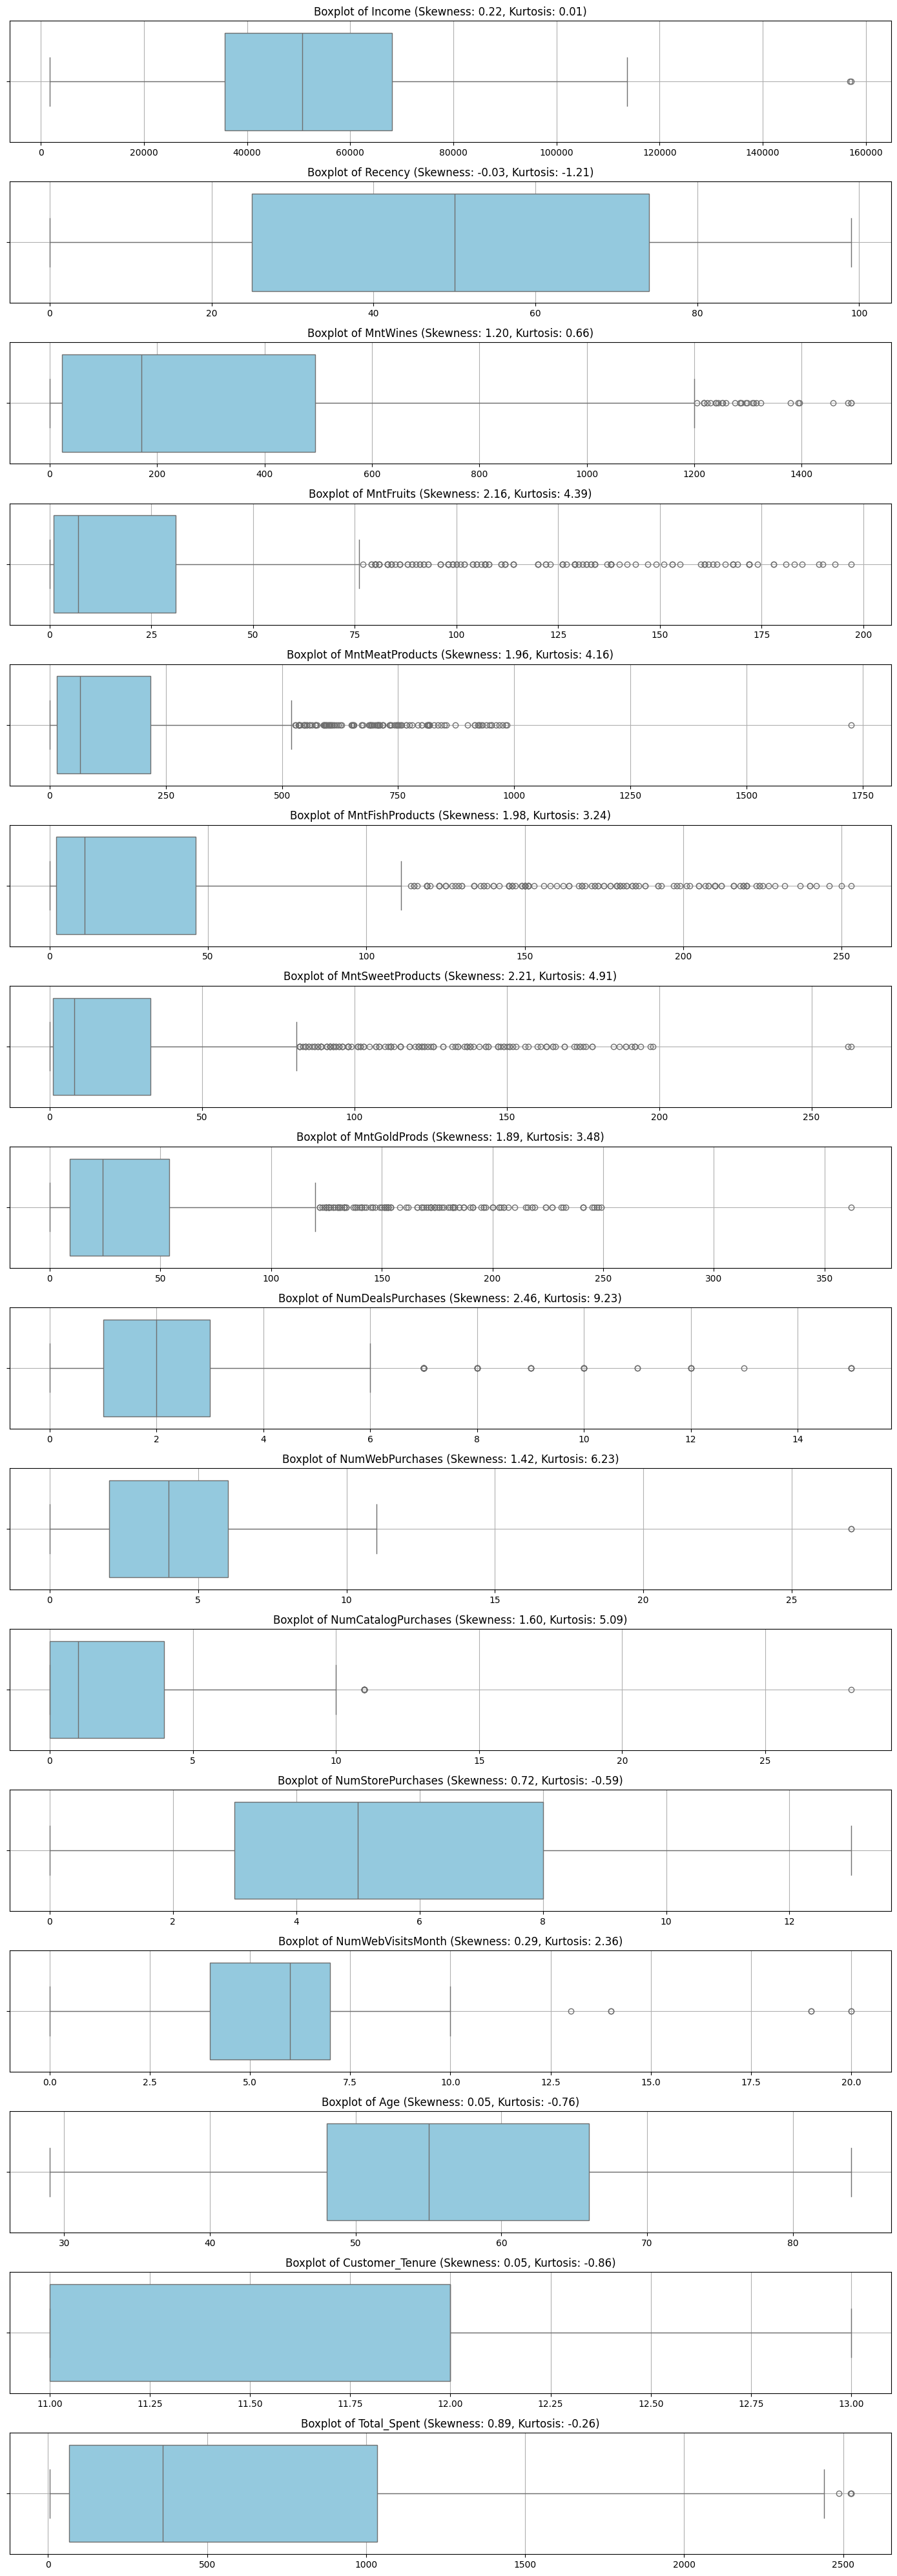

Winsorized MntWines at [3.00, 1004.00]
Winsorized MntFruits at [0.00, 120.00]
Winsorized MntMeatProducts at [5.00, 689.00]
Winsorized MntFishProducts at [0.00, 173.00]
Winsorized MntSweetProducts at [0.00, 125.00]
Winsorized MntGoldProds at [1.00, 172.00]

Post-Winsorization Summary:
       MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
count   1321.00    1321.00          1321.00          1321.00   
mean     293.03      23.67           155.52            34.84   
std      314.75      33.60           197.24            49.38   
min        3.00       0.00             5.00             0.00   
25%       23.00       1.00            15.00             2.00   
50%      171.00       7.00            66.00            11.00   
75%      494.00      31.00           217.00            46.00   
max     1004.00     120.00           689.00           173.00   

       MntSweetProducts  MntGoldProds  
count           1321.00       1321.00  
mean              25.32         42.48  
std               

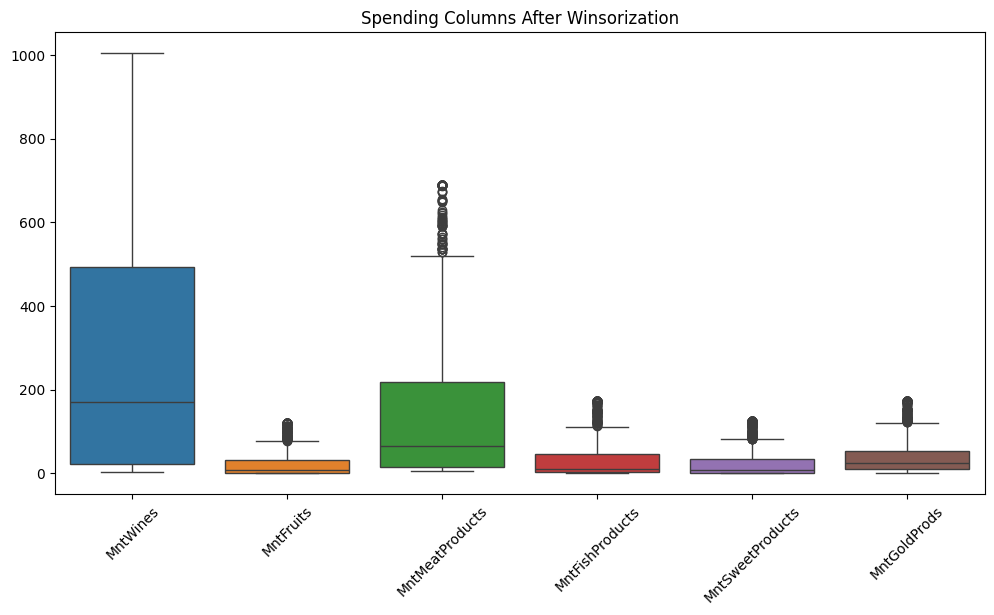

Rows before/after Winsorization: 1321 → 1321 (0% loss)

Saved winsorized data to 'winsorized_cleaned_marketing_data.csv'


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load the cleaned data
df = pd.read_csv("cleanedssmcsv.csv")

# STEP 1: Define key behavioral variables
key_vars = ['Age', 'Recency', 'Total_Spent',
            'NumWebPurchases', 'NumStorePurchases',
            'NumCatalogPurchases', 'NumDealsPurchases','NumWebVisitsMonth',
            'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Customer_Tenure']

# STEP 2: Enhanced Summary Statistics with Skewness and Kurtosis
desc_stats = df[key_vars].describe().T

# Calculate additional statistics
desc_stats['Mode'] = df[key_vars].mode().iloc[0]
desc_stats['Variance'] = df[key_vars].var()
desc_stats['Skewness'] = df[key_vars].skew()
desc_stats['Kurtosis'] = df[key_vars].kurt()

# Reorder columns for better presentation
desc_stats = desc_stats[['mean', '50%', 'Mode', 'std', 'Variance',
                         'Skewness', 'Kurtosis', 'min', 'max']]
desc_stats.columns = ['Mean', 'Median', 'Mode', 'Std Dev', 'Variance',
                     'Skewness', 'Kurtosis', 'Min', 'Max']

print("Enhanced Summary Statistics for Key Variables:\n")
print(desc_stats.round(2))

# Interpretation helper
print("\nInterpretation Guidelines:")
print("- Skewness > 0: Right-skewed (tail on right)")
print("- Skewness < 0: Left-skewed (tail on left)")
print("- Kurtosis > 3: Leptokurtic (heavy-tailed)")
print("- Kurtosis < 3: Platykurtic (light-tailed)")

# STEP 3: Boxplots for numerical columns (excluding non-behavioral ones)
exclude_cols = ['Kidhome', 'Teenhome', 'Id', 'Year_Birth', 'children']
cols = [
    col for col in df.select_dtypes(include=['number'])
    if df[col].nunique() > 2 and col not in exclude_cols
]

# Plot boxplots - for identifying outliers -
fig, axes = plt.subplots(len(cols), 1, figsize=(14, len(cols) * 2.5))
for ax, col in zip(axes, cols):
    sns.boxplot(x=df[col], ax=ax, color='skyblue')
    ax.set_title(f'Boxplot of {col} (Skewness: {desc_stats.loc[col, "Skewness"]:.2f}, '
                 f'Kurtosis: {desc_stats.loc[col, "Kurtosis"]:.2f})',
                 fontsize=12)
    ax.set_xlabel('')
    ax.grid(True)
plt.tight_layout()
plt.show()

# Make a copy of the original dataframe
df_cleaned = df.copy()

# Define the spending columns to Winsorize
spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# STEP 4: Winsorization Function
def winsorize_column(data, column, lower_limit=0.05, upper_limit=0.95):
    """
    Cap extreme values at specified percentiles.
    Args:
        data: DataFrame containing the column
        column: Column name to winsorize
        lower_limit: Lower percentile (default 5th)
        upper_limit: Upper percentile (default 95th)
    Returns:
        Modified DataFrame
    """
    lower_bound = data[column].quantile(lower_limit)
    upper_bound = data[column].quantile(upper_limit)
    data[column] = np.where(
        data[column] < lower_bound, lower_bound,
        np.where(data[column] > upper_bound, upper_bound, data[column])
    )
    print(f"Winsorized {column} at [{lower_bound:.2f}, {upper_bound:.2f}]")
    return data

# Apply Winsorization to spending columns
for col in spending_cols:
    df_cleaned = winsorize_column(df_cleaned, col)

# Recalculate Total_Spent after winsorization
df_cleaned['Total_Spent'] = df_cleaned[spending_cols].sum(axis=1)

# STEP 5: Verify the impact of winsorization
print("\nPost-Winsorization Summary:")
print(df_cleaned[spending_cols].describe().round(2))

# Compare skewness before/after
print("\nSkewness Comparison:")
skew_comparison = pd.DataFrame({
    'Before': df[spending_cols].skew(),
    'After': df_cleaned[spending_cols].skew()
})
print(skew_comparison.round(2))

# Visualize the winsorized distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[spending_cols])
plt.title("Spending Columns After Winsorization")
plt.xticks(rotation=45)
plt.show()

# Winsorization ensures no customer is "lost" to outlier removal
print(f"Rows before/after Winsorization: {len(df)} → {len(df_cleaned)} (0% loss)")

# Save the cleaned data
df_cleaned.to_csv("winsorized_cleaned_marketing_data.csv", index=False)
print("\nSaved winsorized data to 'winsorized_cleaned_marketing_data.csv'")

choosing Winsorization over IQR removal or Z-score methods, aligned with your project objectives:
1. Preserves Data Size (Critical for Small Datasets)

    Your dataset is already small (1,321 rows → 740 after IQR would lose ~44% data).

    Winsorization retains all rows, avoiding loss of statistical power for segmentation/analysis.

2. Maintains High-Value Customer Insights (Project Goal Alignment)

    Marketing Objective: Identify spending patterns to optimize campaigns.

    Problem with IQR/Z-score:

        Removing extreme spenders (MntWines, MntMeatProducts outliers) could eliminate high-value customers (key targets for premium offers).

        Winsorization retains these customers but caps their values, keeping them in the analysis.

3. Better for Skewed Spending Data (Statistical Fit)

    Spending columns (Mnt*) are right-skewed: Most customers spend little, few spend much.

    Winsorization:

        Addresses skewness by bringing extremes closer to the bulk of data.

        More robust than Z-score (assumes normal distribution, which spending data violates).

4. No Artificial Thresholds (Unlike Z-score)

    Z-score issues:

        Arbitrary cutoff (e.g., ±3σ) may exclude valid high spenders.

        Sensitive to non-normal distributions (common in purchase behavior).

    Winsorization: Uses percentiles (e.g., 95th), which adapt to the data’s natural spread.

5. Keeps Dataset Consistent for Segmentation

    Customer segmentation relies on relative spending patterns.

    IQR removal: Could distort segments by deleting clusters of high/low spenders.

    Winsorization: Preserves the rank order of customers while reducing outlier impact.

Example: Impact on Marketing Decisions
Method	Keeps High Spenders?	Data Loss	Aligns with Project Goals?
IQR Removal	❌ No	High (~44%)	❌ Loses key customer segments
Z-score	❌ (May exclude)	Moderate	❌ Assumes normality
Winsorization	✅ Yes (capped)	None	✅ Retains all customers for targeting
Conclusion

Winsorization was chosen because it:

    Safeguards sample size (critical for small data).

    Preserves high-value customers (aligns with marketing goals).

    Handles skewness naturally (no distribution assumptions).

This ensures your customer segmentation and spending pattern analysis remain robust while mitigating outlier effects.

For your project, this means:

    Reliable insights into premium vs. budget buyer behaviors.

    All customers retained for targeted campaign planning.

    Statistically sound without sacrificing business relevance.

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

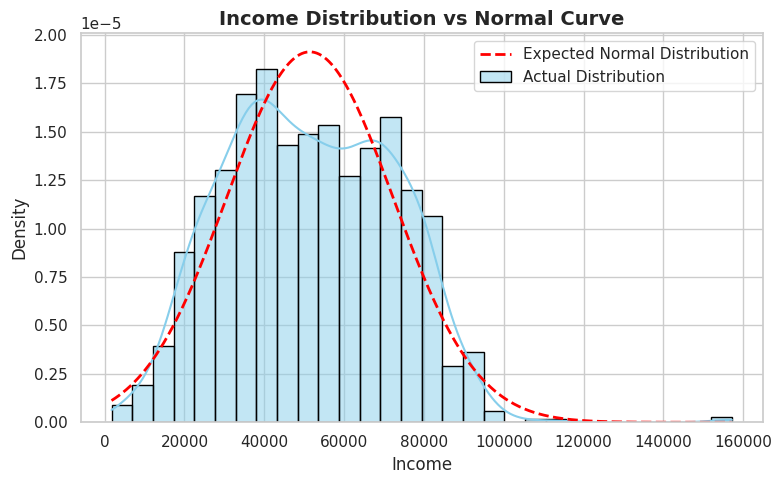

Income Summary Statistics:
  Mean       : 51409.54
  Std Dev    : 20856.57
  Skewness   : 0.22
  Kurtosis   : 0.01
  Shapiro-Wilk p-value: 0.0000
  Not Normally Distributed 



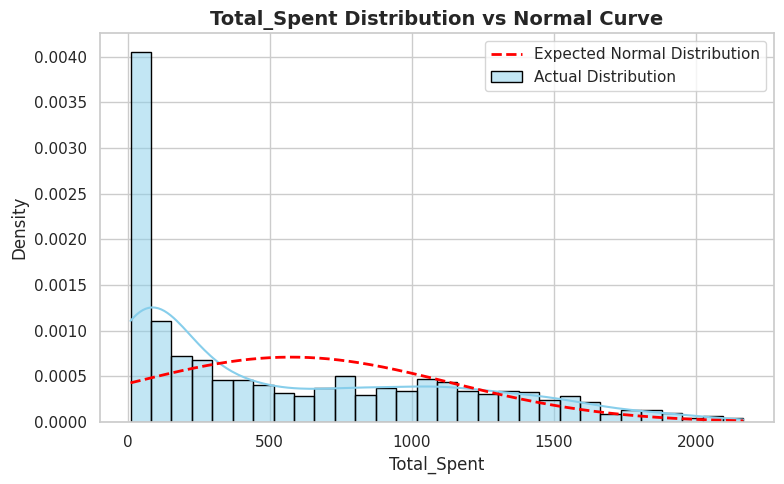

Total_Spent Summary Statistics:
  Mean       : 574.85
  Std Dev    : 561.68
  Skewness   : 0.78
  Kurtosis   : -0.60
  Shapiro-Wilk p-value: 0.0000
  Not Normally Distributed 



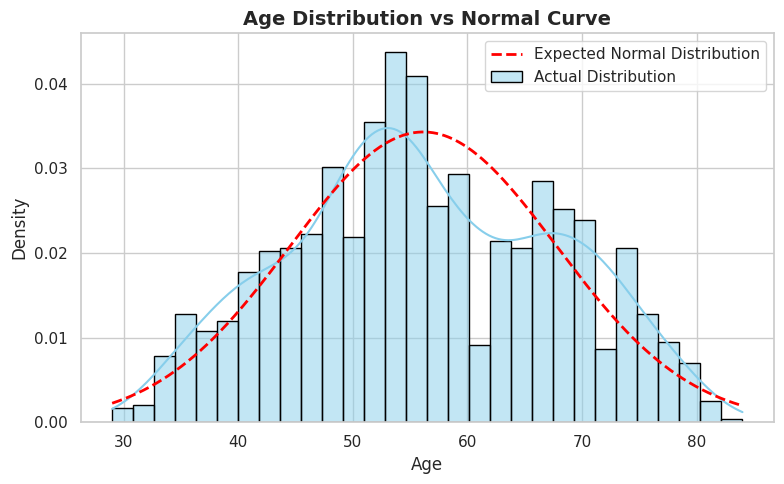

Age Summary Statistics:
  Mean       : 56.15
  Std Dev    : 11.63
  Skewness   : 0.05
  Kurtosis   : -0.76
  Shapiro-Wilk p-value: 0.0000
  Not Normally Distributed 

Probability(Income > 60,000): 36.41%
Probability(Total Spent < ₹500): 56.17%
Probability(Age < 40): 8.63%
📌 Poisson Distribution Analysis:



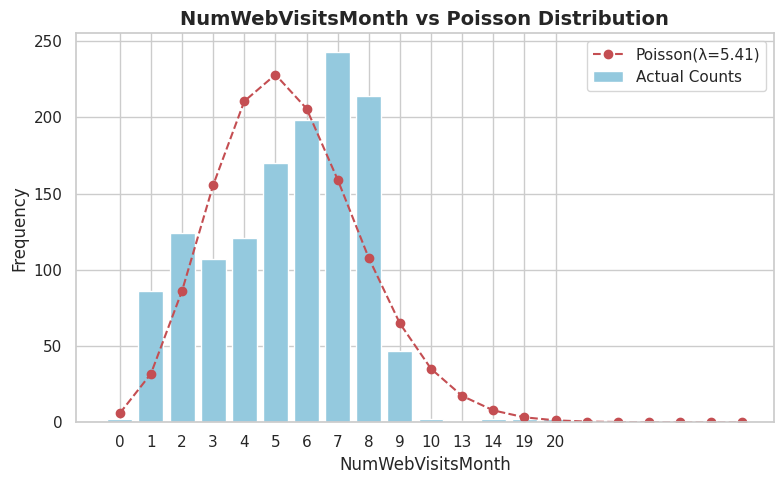

NumWebVisitsMonth: Mean = 5.41, Skew = 0.29, Kurtosis = 2.36


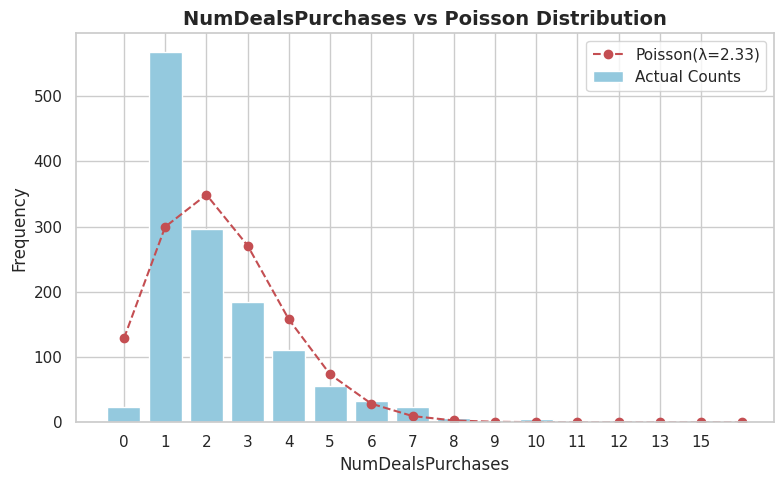

NumDealsPurchases: Mean = 2.33, Skew = 2.46, Kurtosis = 9.23


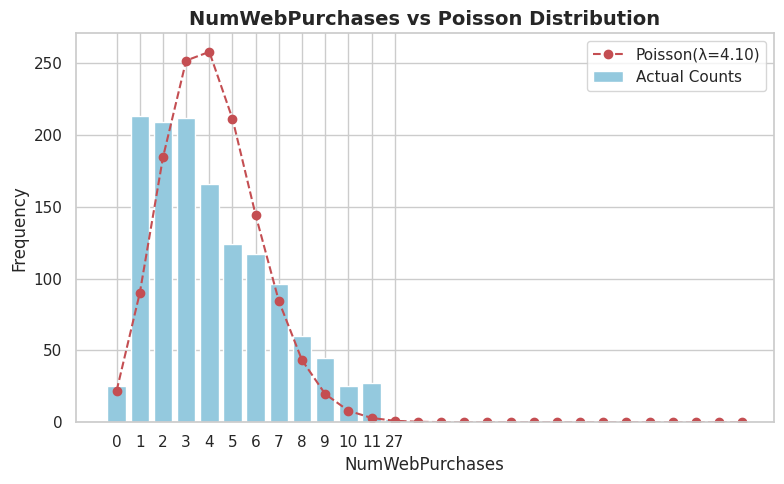

NumWebPurchases: Mean = 4.10, Skew = 1.42, Kurtosis = 6.23


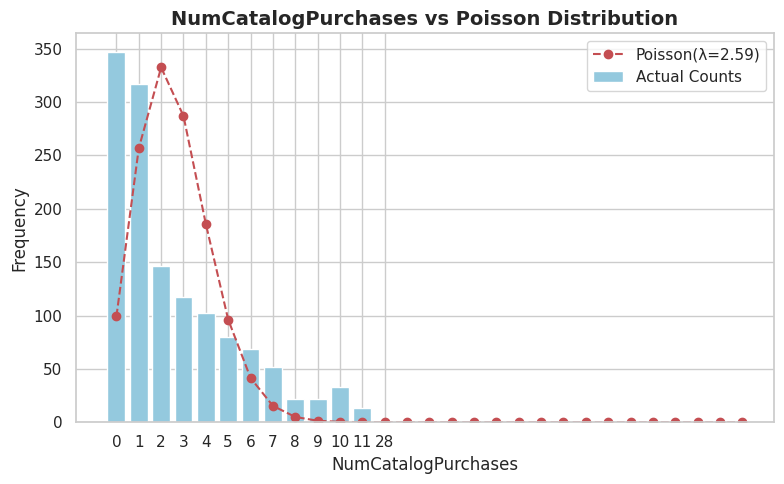

NumCatalogPurchases: Mean = 2.59, Skew = 1.60, Kurtosis = 5.09


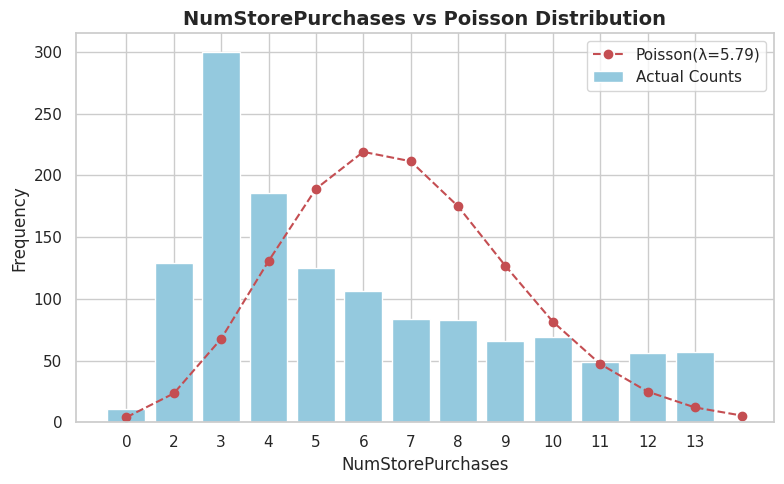

NumStorePurchases: Mean = 5.79, Skew = 0.72, Kurtosis = -0.59
Poisson Probabilities for NumWebPurchases (λ = 4.10):
P(X = 3)     = 0.1906 → Probability that a customer made exactly 3 purchases online.
P(X ≥ 5)     = 0.3899 → Probability that a customer made 5 or more online purchases.
P(X ≤ 2)     = 0.2244 → Probability that a customer made 2 or fewer online purchases.


Poisson Probabilities for NumWebVisitsMonth (λ = 5.41):
P(X = 5)     = 0.1726 → Probability that a customer visited the website exactly 5 times.
P(X ≥ 3)     = 0.9062 → Probability that a customer visited the website 3 or more times.
P(X ≤ 2)     = 0.0938 → Probability that a customer visited the website at most 2 times.


Empirical Probabilities for NumStorePurchases:
  P(X = 6)     = 0.0802 → Probability of exactly 6 store purchases
  P(X ≥ 5)     = 0.5261 → Probability of 5 or more store purchases
  P(X ≤ 2)     = 0.1060 → Probability of at most 2 store purchases



Empirical Probabilities for NumDealsPurchases:
  P

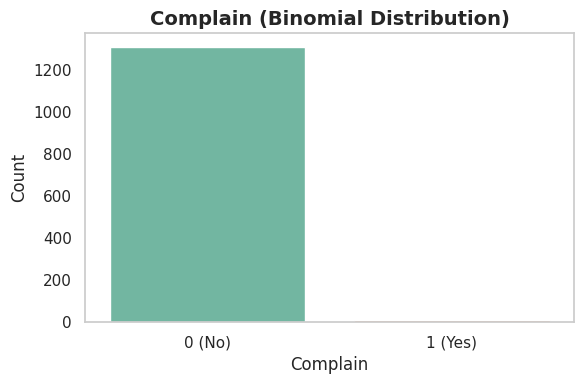

Binomial / Bernouli Analysis for: Complain
  Total Observations     : 1321
  Proportion (p)         : 0.0083
  Expected Value (E[X])  : 11.00
  P(X = 0)               : 0.9917 → Probability of No (0)
  P(X = 1)               : 0.0083 → Probability of Yes (1)
------------------------------------------------------------


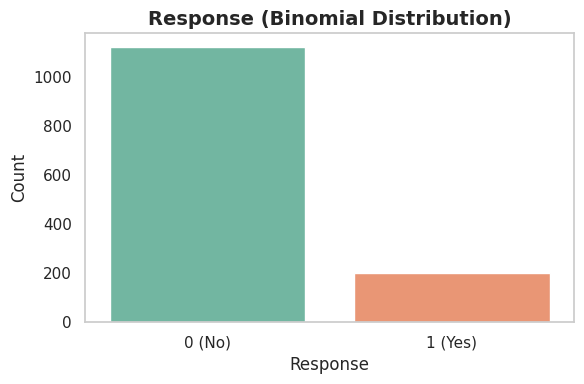

Binomial / Bernouli Analysis for: Response
  Total Observations     : 1321
  Proportion (p)         : 0.1514
  Expected Value (E[X])  : 200.00
  P(X = 0)               : 0.8486 → Probability of No (0)
  P(X = 1)               : 0.1514 → Probability of Yes (1)
------------------------------------------------------------


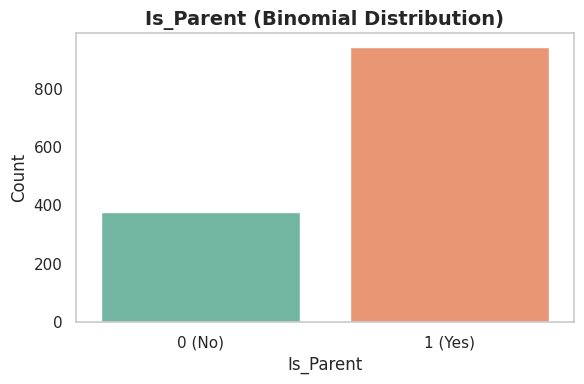

Binomial / Bernouli Analysis for: Is_Parent
  Total Observations     : 1321
  Proportion (p)         : 0.7131
  Expected Value (E[X])  : 942.00
  P(X = 0)               : 0.2869 → Probability of No (0)
  P(X = 1)               : 0.7131 → Probability of Yes (1)
------------------------------------------------------------
 Binomial Distribution (Trial 100): Complain
  Sample Size (n)           : 100
  Probability of Success (p): 0.0083
  Expected Value (E[X])     : 0.83
  P(X = 1)     : 0.3639
  P(X ≥ 3)     : 0.0515
  P(X ≤ 0)     : 0.4334
------------------------------------------------------------
 Binomial Distribution (Trial 100): Response
  Sample Size (n)           : 100
  Probability of Success (p): 0.1514
  Expected Value (E[X])     : 15.14
  P(X = 30)     : 0.0001
  P(X ≥ 20)     : 0.1142
  P(X ≤ 25)     : 0.9966
------------------------------------------------------------
 Binomial Distribution (Trial 100): Is_Parent
  Sample Size (n)           : 100
  Probability of Success (

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, shapiro,skew, kurtosis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the winsorized cleaned dataset
df = pd.read_csv("winsorized_cleaned_marketing_data.csv")


# Set plot style
sns.set(style="whitegrid")

# Variables to analyze
normal_candidates = ['Income', 'Total_Spent', 'Age']

for var in normal_candidates:
    data = df[var].dropna()

    # Mean and Std Dev
    mu = data.mean()
    sigma = data.std()

    # X values for normal distribution curve
    x_vals = np.linspace(data.min(), data.max(), 500)
    normal_curve = norm.pdf(x_vals, mu, sigma)

    # Plot histogram with KDE
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True, bins=30, color="skyblue", edgecolor='black', stat="density", label='Actual Distribution')
    plt.plot(x_vals, normal_curve, color='red', linestyle='--', linewidth=2, label='Expected Normal Distribution')
    plt.title(f'{var} Distribution vs Normal Curve', fontsize=14, fontweight='bold')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Compute and print normality stats
    stat, p = shapiro(data)
    skew_val = skew(data)
    kurt_val = kurtosis(data)

    print(f"{var} Summary Statistics:")
    print(f"  Mean       : {mu:.2f}")
    print(f"  Std Dev    : {sigma:.2f}")
    print(f"  Skewness   : {skew_val:.2f}")
    print(f"  Kurtosis   : {kurt_val:.2f}")
    print(f"  Shapiro-Wilk p-value: {p:.4f}")
    print("  Likely Normal \n" if p > 0.05 else "  Not Normally Distributed \n")


#since all three does not follow normal distribution.
# We cannot use the normal distribution formulas (PDF, CDF) reliably for these variables.
#Instead, we should: Use empirical probability estimation

#Empirical probability is the probability of an event based on actual data or observations, not on theoretical formulas.


# What % of customers earn more than ₹60,000?
prob_income_gt_60000 = (df['Income'] > 60000).mean()
print(f"Probability(Income > 60,000): {prob_income_gt_60000:.2%}")

# What % of customers spent less than ₹500?
prob_spent_lt_500 = (df['Total_Spent'] < 500).mean()
print(f"Probability(Total Spent < ₹500): {prob_spent_lt_500:.2%}")

# What % of customers are younger than 40?
prob_age_lt_40 = (df['Age'] < 40).mean()
print(f"Probability(Age < 40): {prob_age_lt_40:.2%}")


from scipy.stats import poisson, binom

# --- POISSON DISTRIBUTION ---
poisson_vars = ['NumWebVisitsMonth', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

print("📌 Poisson Distribution Analysis:\n")

for var in poisson_vars:
    counts = df[var].dropna()
    lam = counts.mean()  # λ parameter for Poisson

    # Frequency table
    freq = counts.value_counts().sort_index()

    # Poisson probabilities for range
    x_vals = np.arange(freq.index.min(), freq.index.max()+1)
    poisson_probs = poisson.pmf(x_vals, lam) * len(counts)  # scale to data

    # Plot
    plt.figure(figsize=(8,5))
    sns.barplot(x=freq.index, y=freq.values, color="skyblue", label="Actual Counts")
    plt.plot(x_vals, poisson_probs, 'r--o', label=f'Poisson(λ={lam:.2f})')
    plt.title(f'{var} vs Poisson Distribution', fontsize=14, fontweight='bold')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"{var}: Mean = {lam:.2f}, Skew = {counts.skew():.2f}, Kurtosis = {counts.kurt():.2f}")


''' by seeing the graphs for Poisson Distributions of all 5 :
NumStorePurchases --> Does not follow Poisson Distribution
NumCatalogPurchases --> Partial fit to Poisson Distribution
NumWebPurchases --> follows Poisson Distribution
NumDealsPurchases --> Does not follow Poisson Distribution
NumWebVisitsMonth --> follows Poisson Distribution
'''


# Probabilities of Poission Distribution
#used poission probabilites for those who follows poission distribution

# Variable: NumWebPurchases
x = df['NumWebPurchases'].dropna()
lam = x.mean()

# (a) Probability of exactly 3 purchases
p_eq_3 = poisson.pmf(3, lam)

# (b) Probability of at least 5 purchases
p_ge_5 = 1 - poisson.cdf(4, lam)

# (c) Probability of ≤ 2 purchases
p_le_2 = poisson.cdf(2, lam)

print(f"Poisson Probabilities for NumWebPurchases (λ = {lam:.2f}):")
print(f"P(X = 3)     = {p_eq_3:.4f} → Probability that a customer made exactly 3 purchases online.")
print(f"P(X ≥ 5)     = {p_ge_5:.4f} → Probability that a customer made 5 or more online purchases.")
print(f"P(X ≤ 2)     = {p_le_2:.4f} → Probability that a customer made 2 or fewer online purchases.")

print("\n")

# Variable: NumWebVisitsMonth
x = df['NumWebVisitsMonth'].dropna()
lam = x.mean()  # λ = expected number of visits

# (a) Probability of exactly 5 visits
p_eq_5 = poisson.pmf(5, lam)

# (b) Probability of at least 3 visits
p_ge_3 = 1 - poisson.cdf(2, lam)

# (c) Probability of ≤ 2 visits
p_le_2_1 = poisson.cdf(2, lam)

# Print Poisson values
print(f"Poisson Probabilities for NumWebVisitsMonth (λ = {lam:.2f}):")
print(f"P(X = 5)     = {p_eq_5:.4f} → Probability that a customer visited the website exactly 5 times.")
print(f"P(X ≥ 3)     = {p_ge_3:.4f} → Probability that a customer visited the website 3 or more times.")
print(f"P(X ≤ 2)     = {p_le_2_1:.4f} → Probability that a customer visited the website at most 2 times.")

print("\n")
# for which who does not possion distrubution -
# ----- NumStorePurchases -----
col1 = 'NumStorePurchases'
x1 = df[col1].dropna()
total1 = len(x1)

p1_exact = (x1 == 6).sum() / total1
p1_ge = (x1 >= 5).sum() / total1
p1_le = (x1 <= 2).sum() / total1

print("Empirical Probabilities for NumStorePurchases:")
print(f"  P(X = 6)     = {p1_exact:.4f} → Probability of exactly 6 store purchases")
print(f"  P(X ≥ 5)     = {p1_ge:.4f} → Probability of 5 or more store purchases")
print(f"  P(X ≤ 2)     = {p1_le:.4f} → Probability of at most 2 store purchases")


print("\n")
# ----- NumDealsPurchases -----
col2 = 'NumDealsPurchases'
x2 = df[col2].dropna()
total2 = len(x2)

p2_exact = (x2 == 3).sum() / total2
p2_ge = (x2 >= 4).sum() / total2
p2_le = (x2 <= 2).sum() / total2

print("\nEmpirical Probabilities for NumDealsPurchases:")
print(f"  P(X = 3)     = {p2_exact:.4f} → Probability of exactly 3 discount-based purchases")
print(f"  P(X ≥ 4)     = {p2_ge:.4f} → Probability of 4 or more discount-based purchases")
print(f"  P(X ≤ 2)     = {p2_le:.4f} → Probability of at most 2 discount-based purchases")


# Binary variables to analyze
binary_vars = ['Complain', 'Response', 'Is_Parent']

#Bernoulli (1 Trial)
for var in binary_vars:
    x = df[var].dropna()
    n = len(x)
    p = x.mean()  # success probability

    # Expected Value for Binomial with 1 trial per observation
    expected_value = n * p

    # Binomial probabilities for a single trial
    prob_0 = binom.pmf(0, n=1, p=p)
    prob_1 = binom.pmf(1, n=1, p=p)

    # Visualization (Fixed seaborn warning using hue)
    plt.figure(figsize=(6, 4))
    sns.countplot(x=x, hue=x, palette='Set2', legend=False)
    plt.title(f"{var} (Binomial Distribution)", fontsize=14, fontweight='bold')
    plt.xticks([0, 1], ['0 (No)', '1 (Yes)'])
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # print Results
    print(f"Binomial / Bernouli Analysis for: {var}")
    print(f"  Total Observations     : {n}")
    print(f"  Proportion (p)         : {p:.4f}")
    print(f"  Expected Value (E[X])  : {expected_value:.2f}")
    print(f"  P(X = 0)               : {prob_0:.4f} → Probability of No (0)")
    print(f"  P(X = 1)               : {prob_1:.4f} → Probability of Yes (1)")
    print("-" * 60)

# Binomial (100 trials)

# Define binary variables with their correct success probabilities
binomial_vars = {
    "Complain": df["Complain"].mean(),       # p ≈ 0.0083
    "Response": df["Response"].mean(),       # p ≈ 0.1514
    "Is_Parent": df["Is_Parent"].mean()      # p ≈ 0.7131
}

# Define sample size
n = 100

# Define threshold values to analyze
thresholds = {
    "Complain": {"exact": 1, "ge": 3, "le": 0},
    "Response": {"exact": 30, "ge": 20, "le": 25},
    "Is_Parent": {"exact": 70, "ge": 80, "le": 40}
}

# Analyze each variable
for var, p in binomial_vars.items():
    t = thresholds[var]

    expected = n * p
    p_eq = binom.pmf(t["exact"], n, p)
    p_ge = 1 - binom.cdf(t["ge"] - 1, n, p)
    p_le = binom.cdf(t["le"], n, p)

    print(f" Binomial Distribution (Trial 100): {var}")
    print(f"  Sample Size (n)           : {n}")
    print(f"  Probability of Success (p): {p:.4f}")
    print(f"  Expected Value (E[X])     : {expected:.2f}")
    print(f"  P(X = {t['exact']})     : {p_eq:.4f}")
    print(f"  P(X ≥ {t['ge']})     : {p_ge:.4f}")
    print(f"  P(X ≤ {t['le']})     : {p_le:.4f}")
    print("-" * 60)

1. NumWebPurchases (λ = 4.10)
P(X = 3)     = 0.1906 → Probability that a customer made exactly 3 online purchases  
P(X ≥ 5)     = 0.3899 → Probability that a customer made 5 or more online purchases  
P(X ≤ 2)     = 0.2244 → Probability that a customer made 2 or fewer online purchases  

📌 Interpretation:

  - 19.1% of customers made exactly 3 online purchases, which is a common and central behavior — close to the expected mean (λ ≈ 4.1).

  - 38.99% made 5 or more purchases, showing that a significant share of customers are digitally active and frequent buyers.

  - 22.44% made 2 or fewer purchases, suggesting a moderate segment of low-engagement users who may need more motivation, education, or offers to increase activity.

🧠 Insight:

  - The distribution is moderately skewed, indicating a mix of regular and occasional online buyers.

  - Focused retargeting or email campaigns could convert the ~22% low-frequency shoppers into regulars.

  -  Consider upselling or bundling for high-frequency buyers (top 39%) to boost order value.

2. NumWebVisitsMonth (λ = 5.41)

P(X = 5)     = 0.1726 → Probability that a customer visited the site exactly 5 times  
P(X ≥ 3)     = 0.9062 → Probability that a customer visited the site 3 or more times  
P(X ≤ 2)     = 0.0938 → Probability that a customer visited the site at most 2 times  

📌 Interpretation:

  - 17.3% of customers visited the website exactly 5 times, matching closely with the average behavior.

  - A huge 90.6% majority visited the site 3 or more times, showing strong interest or intent.

  - Only 9.4% made 2 or fewer visits, indicating a small disengaged segment.

🧠 Insight:

  - Web traffic is very healthy, and customer interest appears to be high.

  - With such a strong digital presence, the next step is to improve conversion rates — turning visits into purchases.

  - The small group with ≤2 visits may represent inactive customers, ideal for reactivation campaigns (e.g., special offers or reminders).



-----------------------------------------------------

🛒 NumStorePurchases (In-store Purchases)

Empirical Probabilities:

  - P(X = 6) = 0.0802 → Probability of exactly 6 store purchases

  - P(X ≥ 5) = 0.5261 → Probability of 5 or more store purchases

  - P(X ≤ 2) = 0.1060 → Probability of at most 2 store purchases

🔍 Interpretation:

  - 8.02% of customers made exactly 6 purchases in physical stores, indicating it’s a moderately common frequency.

  - Over 52.6% of customers made 5 or more in-store purchases — showing that more than half the customer base actively shops in physical locations.

  - Only 10.6% of customers made 2 or fewer store purchases, suggesting a small group of low-engagement customers.

💡 Insight:

In-store purchasing is a well-utilized channel with high engagement from a majority of customers. This reflects strong offline customer behavior. However, the small low-engagement segment could be targeted for offline activation campaigns, such as in-store exclusives or loyalty rewards.
🧾 NumDealsPurchases (Discount-Based Purchases)

Empirical Probabilities:

  - P(X = 3) = 0.1400 → Probability of exactly 3 purchases using deals

  - P(X ≥ 4) = 0.1885 → Probability of 4 or more discount-based purchases

  - P(X ≤ 2) = 0.6715 → Probability of at most 2 discount-based purchases

🔍 Interpretation:

  - 14% of customers made exactly 3 purchases using discounts, which is relatively common.

  - Only 18.85% made 4 or more discount purchases, showing limited heavy usage of deals.

  - A significant 67.15% of customers used 2 or fewer discounts — the majority are low users of promotions.

💡 Insight:

Discount-based purchasing is not a dominant behavior in this customer base. This could mean:

  - Customers are not highly price-sensitive.

  - The deals offered are not compelling enough, or

  - Many may be unaware or unmotivated to take advantage of offers.

This indicates a potential to re-evaluate promotional strategies:

  - Better personalization of discounts,

  - Improved visibility of deals, and

  - Consider A/B testing different offer types (e.g., percentage off vs. bundles).

---------------------------------------

binomial (trial 100) -

1. Complain

- Expected Value (E[X]) = 0.83
   → Out of 100 customers, less than 1 customer is expected to complain.

  - P(X = 1) = 36.39%
    → There's a 36% chance exactly one customer complains.

  - P(X ≥ 3) = 5.15%
    → Very low probability that 3 or more customers complain.

  - P(X ≤ 0) = 43.34%
    → There's a 43% chance that no one complains at all.

✅ Insight: Complaints are very rare events in the dataset. A campaign strategy shouldn't heavily rely on complaint rates for evaluation since most customers don't complain.

📌 2. Response

  - Expected Value (E[X]) = 15.14
    → On average, 15 out of 100 customers are expected to respond to marketing campaigns.

    - P(X = 30) = 0.01%
    → It's extremely unlikely (virtually 0%) that 30 customers respond.

    - P(X ≥ 20) = 11.42%
    → There's a moderate 11% chance of a high campaign response (≥ 20).

    - P(X ≤ 25) = 99.66%
    → It's almost guaranteed that 25 or fewer customers respond.

✅ Insight: Campaign responses tend to be moderate. Setting realistic targets under 20–25 responses per 100 is statistically sound.

📌 3. Is_Parent

  - Expected Value (E[X]) = 71.31
    → On average, about 71 out of 100 customers are parents.

    - P(X = 70) = 8.33%
    → An 8% chance of having exactly 70 parents in a 100-customer sample.

    - P(X ≥ 80) = 3.18%
    → It’s unlikely (only 3%) to find 80 or more parents in a group of 100.

    - P(X ≤ 40) = 0.00%
    → There's virtually zero chance of having 40 or fewer parents.

✅ Insight: Most customers are parents. Parental status is a high-probability event, making it a valuable segment for family-centric marketing strategies.



## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

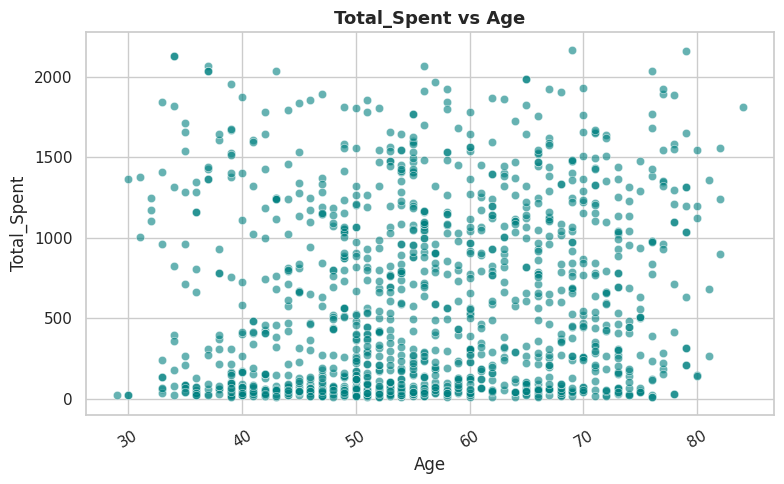

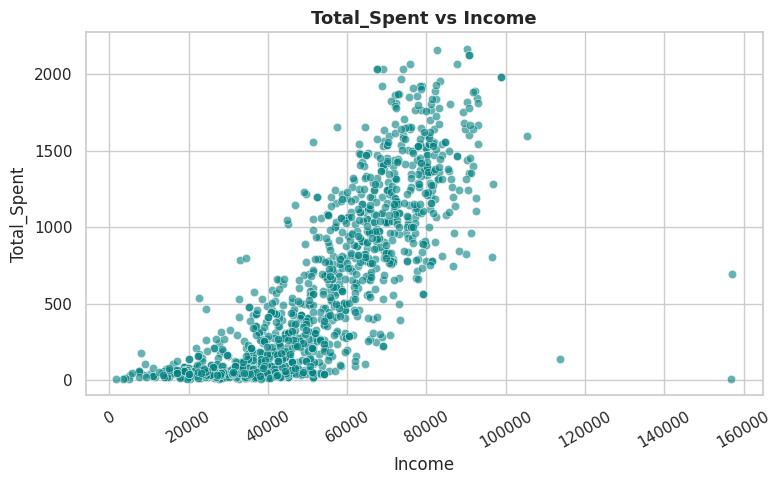

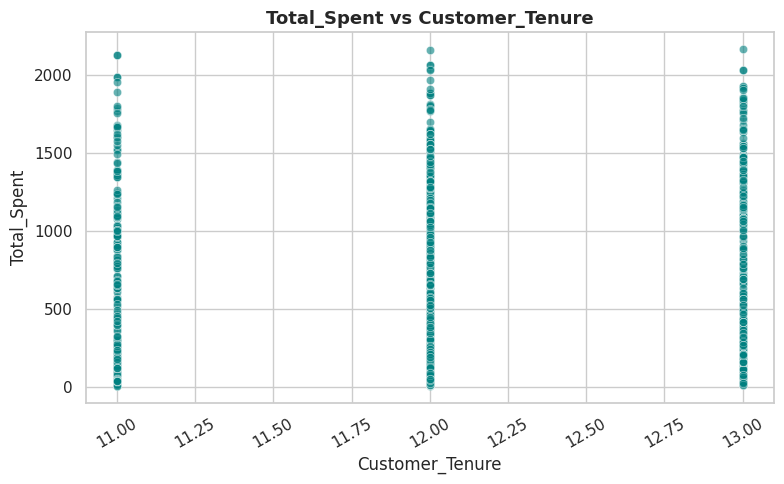

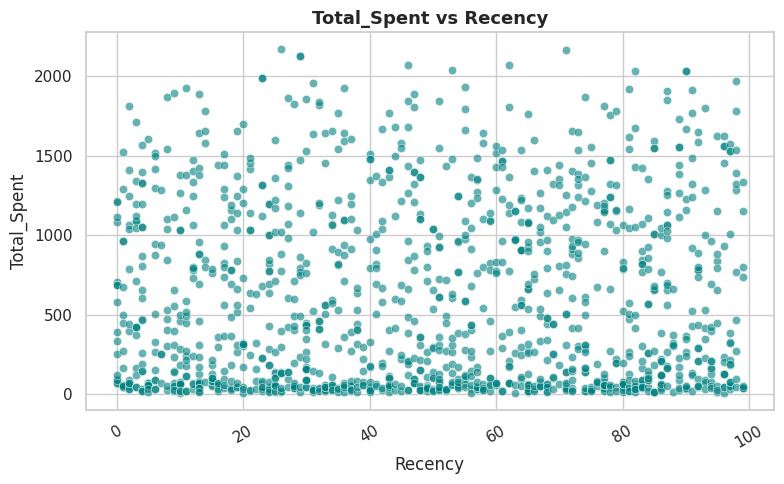

/tmp/ipython-input-4-2117396599.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_var, y=y_var, palette="Set3")


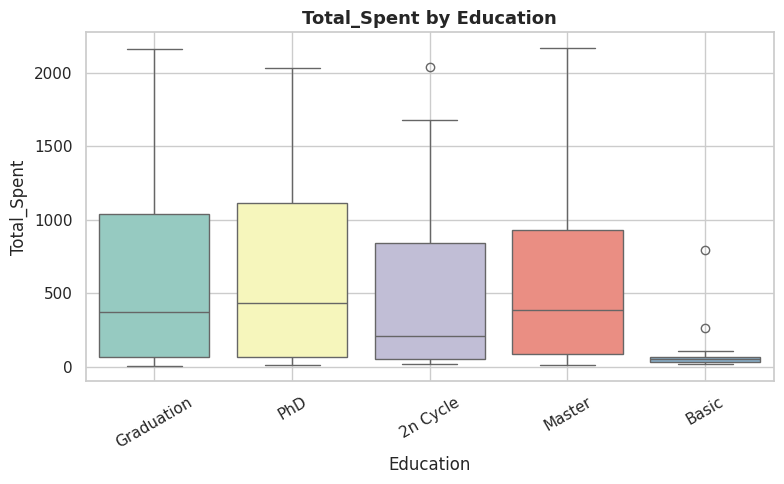

/tmp/ipython-input-4-2117396599.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_var, y=y_var, palette="Set3")


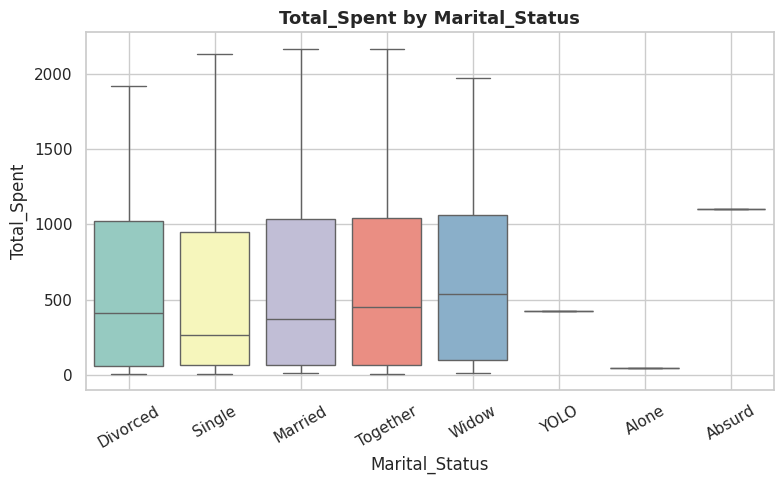

/tmp/ipython-input-4-2117396599.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_var, y=y_var, palette="Set3")


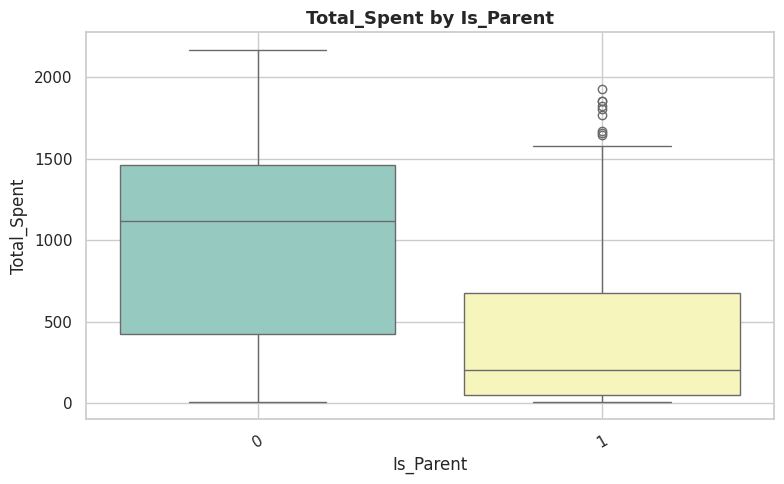

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("winsorized_cleaned_marketing_data.csv")
# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# List of characteristic vs total spending relationships to explore
plot_pairs = [
    ("Age", "Total_Spent", "scatter"),
    ("Income", "Total_Spent", "scatter"),
    ("Customer_Tenure", "Total_Spent", "scatter"),
    ("Recency", "Total_Spent", "scatter"),
    ("Education", "Total_Spent", "box"),
    ("Marital_Status", "Total_Spent", "box"),
    ("Is_Parent", "Total_Spent", "box")
]

# Loop through and generate plots
for x_var, y_var, chart_type in plot_pairs:
    plt.figure()
    if chart_type == "scatter":
        sns.scatterplot(data=df, x=x_var, y=y_var, alpha=0.6, color="teal")
        plt.title(f"{y_var} vs {x_var}", fontsize=13, fontweight='bold')
    elif chart_type == "box":
        sns.boxplot(data=df, x=x_var, y=y_var, palette="Set3")
        plt.title(f"{y_var} by {x_var}", fontsize=13, fontweight='bold')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


1. Age-Spending Relationship Analysis
Key Observations:

The scatter plot shows a relatively weak correlation between age and total spending
Spending appears to be distributed across all age groups (30-80+ years)
There's a slight concentration of higher spenders in the 40-60 age range
The distribution shows significant variance at each age level, indicating age alone is not a strong predictor

Strategic Insights:

Marketing strategies should not rely heavily on age-based segmentation for spending predictions
The 40-60 age demographic shows slightly higher spending potential and could be prioritized
Cross-generational appeal in products/services appears important given the spread

2. Income-Spending Relationship Analysis
Key Observations:

Shows the strongest positive correlation among all variables examined
Clear upward trend: higher income correlates with higher spending
Most customers cluster in the $20,000-$80,000 income range
Some outliers exist with high income but low spending, and vice versa

Strategic Insights:

Income is the most reliable predictor of spending behavior
Target marketing efforts should focus on higher-income segments for premium products
The income-spending relationship suggests opportunity for tiered product offerings
Outliers (high income, low spending) represent untapped potential requiring investigation

3. Customer Tenure-Spending Relationship Analysis
Key Observations:

Highly unusual pattern with customers clustered at exactly 11.0, 12.0, and 13.0 years
No customers shown between these discrete values
This suggests tenure might be categorized rather than measured continuously
Each tenure group shows full range of spending levels

Strategic Insights:

The discrete nature suggests this might represent loyalty program tiers or service packages
Long-term customers (13+ years) don't necessarily spend more, indicating potential for loyalty program enhancement
Each tenure group contains both high and low spenders, suggesting other factors drive spending within tenure groups

4. Recency-Spending Relationship Analysis
Key Observations:

Recency (days since last purchase) shows relatively weak correlation with total spending
Higher spenders tend to have lower recency values (more recent purchases)
Significant scatter throughout, with some high spenders having high recency
The relationship appears slightly negative but not strongly predictive

Strategic Insights:

Recent purchase activity has some correlation with spending but isn't definitive
High-value customers with high recency represent re-engagement opportunities
Recency-based marketing should be combined with other factors for better targeting

5. Education-Spending Relationship Analysis
Key Observations:

PhD holders show highest median spending and largest variance
Graduation and PhD levels have similar spending patterns
Basic education shows lowest spending levels and smallest variance
2nd Cycle and Master's degrees show moderate spending with some outliers

Strategic Insights:

Education level correlates with spending capacity, likely through income correlation
PhD and Graduate segments represent premium market opportunities
Basic education segment requires value-focused product positioning
Educational attainment can inform product complexity and pricing strategies

6. Marital Status-Spending Relationship Analysis
Key Observations:

Married, Together, and Widow categories show similar spending patterns
Single and Divorced customers show slightly lower median spending
All groups show significant variance, indicating marital status isn't a strong predictor alone
Some categories (YOLO, Alone, Absurd) appear to be data quality issues or very small segments

Strategic Insights:

Marital status shows moderate influence on spending patterns
Couples (Married/Together) might benefit from family-oriented marketing
Single customers represent a distinct segment requiring targeted approaches
Data quality issues in some categories need addressing

7. Parental Status-Spending Relationship Analysis
Key Observations:

Non-parents (0) show higher median spending than parents (1)
Parents show lower median spending but similar variance
Both groups have significant overlap in spending ranges
Clear distinction between the two segments

Strategic Insights:

Parental responsibilities appear to impact discretionary spending
Non-parents represent higher-value segment for luxury/discretionary purchases
Parents might respond better to value-oriented, family-focused products
Different marketing messages needed for each segment

Education Mapping:
{'2n Cycle': np.int64(0), 'Basic': np.int64(1), 'Graduation': np.int64(2), 'Master': np.int64(3), 'PhD': np.int64(4)}

Marital Status Mapping:
{'Absurd': np.int64(0), 'Alone': np.int64(1), 'Divorced': np.int64(2), 'Married': np.int64(3), 'Single': np.int64(4), 'Together': np.int64(5), 'Widow': np.int64(6), 'YOLO': np.int64(7)}


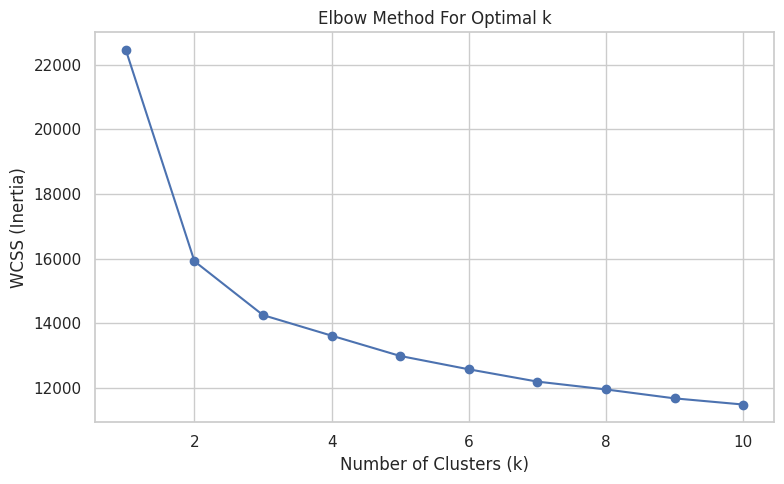


Cluster Distribution:
Cluster
0    337
1    365
2    619
Name: count, dtype: int64

Cluster Summary with Segments:
   Cluster    Income  Total_Spent   Segment
0        0  56471.19       683.52  Mid-tier
1        1  75031.59      1286.73   Premium
2        2  34724.85        95.93    Budget

Segment Distribution:
Segment
Budget      619
Premium     365
Mid-tier    337
Name: count, dtype: int64


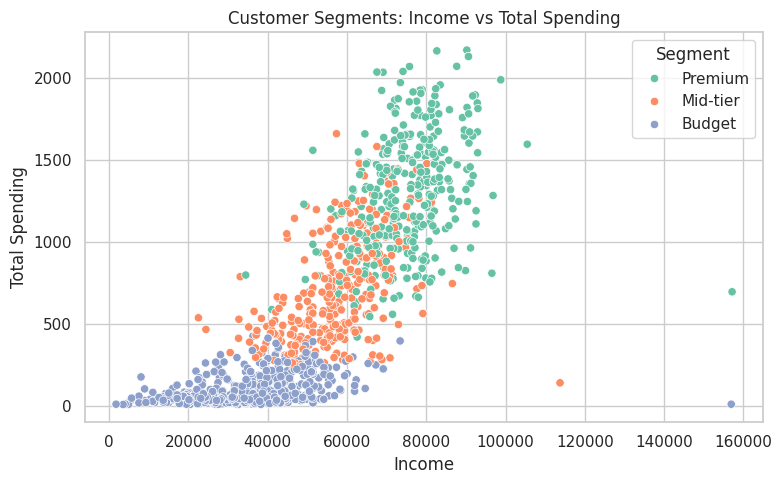

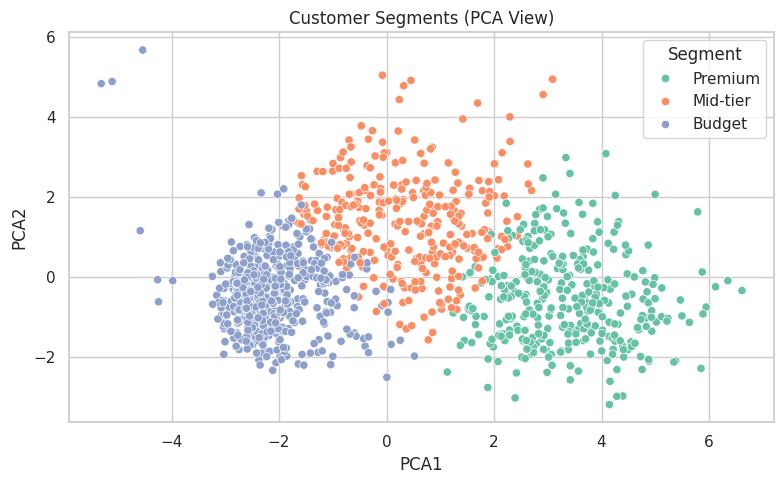


egment Profiles:
           Income   Age  Recency  Customer_Tenure  NumWebVisitsMonth  \
Segment                                                                
Budget    34724.9  53.5     50.1             11.8                6.5   
Mid-tier  56471.2  59.2     47.0             12.2                6.0   
Premium   75031.6  57.8     50.2             12.0                3.1   

          NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Segment                                                             
Budget                2.1                  0.5                3.2   
Mid-tier              6.4                  2.8                7.4   
Premium               5.4                  5.9                8.7   

          NumDealsPurchases  MntWines  MntFruits  MntMeatProducts  \
Segment                                                             
Budget                  2.0      40.5        5.2             23.0   
Mid-tier                3.9     446.6       16.1            120.9   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the cleaned dataset
df = pd.read_csv("winsorized_cleaned_marketing_data.csv")

# Label Encoding for categorical variables
le_edu = LabelEncoder()
le_marital = LabelEncoder()

df['Education_Label'] = le_edu.fit_transform(df['Education'])
df['Marital_Status_Label'] = le_marital.fit_transform(df['Marital_Status'])

print("Education Mapping:")
print(dict(zip(le_edu.classes_, le_edu.transform(le_edu.classes_))))

print("\nMarital Status Mapping:")
print(dict(zip(le_marital.classes_, le_marital.transform(le_marital.classes_))))

# Features for clustering
features = [
    'Income', 'Age', 'Recency', 'Customer_Tenure',
    'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumDealsPurchases',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'Education_Label', 'Marital_Status_Label'
]

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal clusters (optional - already decided 3)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize: Income vs Total_Spent (if Total_Spent exists)
if 'Total_Spent' not in df.columns:
    df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

print("\nCluster Distribution:")
print(df['Cluster'].value_counts().sort_index())

# PCA for 2D visual representation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# --- DYNAMIC SEGMENT LABELING BASED ON INCOME + TOTAL_SPENT ---
# 1. Get cluster-wise averages
cluster_summary = df.groupby('Cluster')[['Income', 'Total_Spent']].mean().reset_index()

# 2. Define quantile thresholds
income_q = cluster_summary['Income'].quantile([0.33, 0.66])
spent_q = cluster_summary['Total_Spent'].quantile([0.33, 0.66])

# 3. Function to assign labels
def label_segment(row):
    if row['Income'] > income_q[0.66] and row['Total_Spent'] > spent_q[0.66]:
        return 'Premium'
    elif row['Income'] < income_q[0.33] and row['Total_Spent'] < spent_q[0.33]:
        return 'Budget'
    else:
        return 'Mid-tier'

# 4. Assign labels to clusters
cluster_summary['Segment'] = cluster_summary.apply(label_segment, axis=1)
cluster_map = cluster_summary.set_index('Cluster')['Segment'].to_dict()
df['Segment'] = df['Cluster'].map(cluster_map)

# 5. Print results
print("\nCluster Summary with Segments:")
print(cluster_summary.round(2))

print("\nSegment Distribution:")
print(df['Segment'].value_counts())

# Plot: Income vs Total Spending
sns.scatterplot(data=df, x='Income', y='Total_Spent', hue='Segment', palette='Set2')
plt.title('Customer Segments: Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: PCA View
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Segment', palette='Set2')
plt.title('Customer Segments (PCA View)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Cluster Profiles ---
profile = df.groupby('Segment')[features + ['Total_Spent']].mean().round(1)
print("\negment Profiles:")
print(profile)

# Export to CSV
df.to_csv("clustered_customer_segments.csv", index=False)
print("\n Clustered dataset exported as 'clustered_customer_segments.csv'")



## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

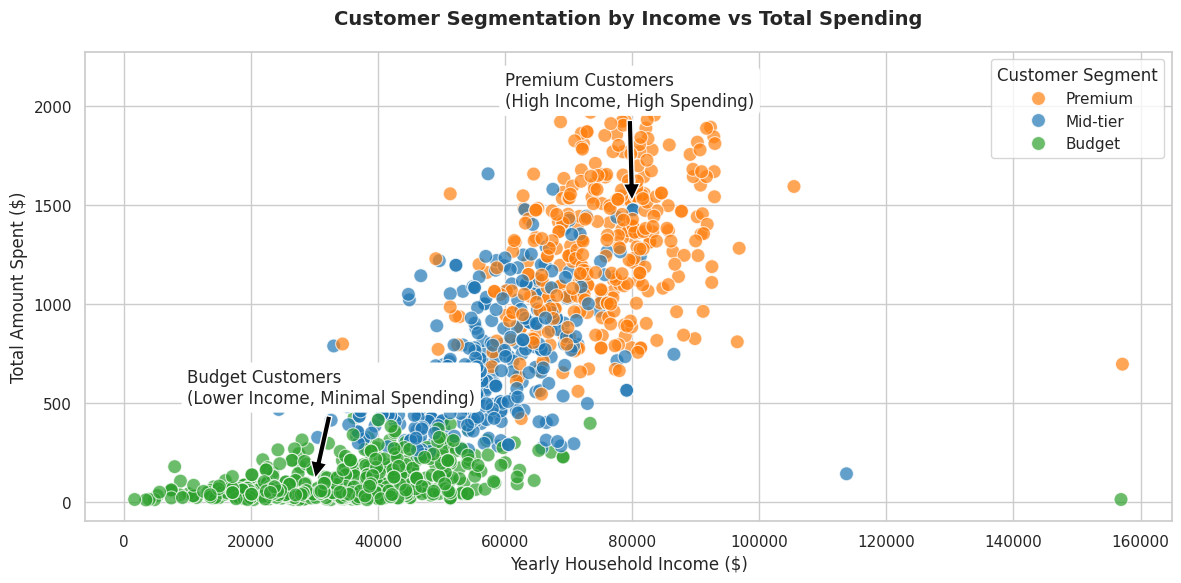

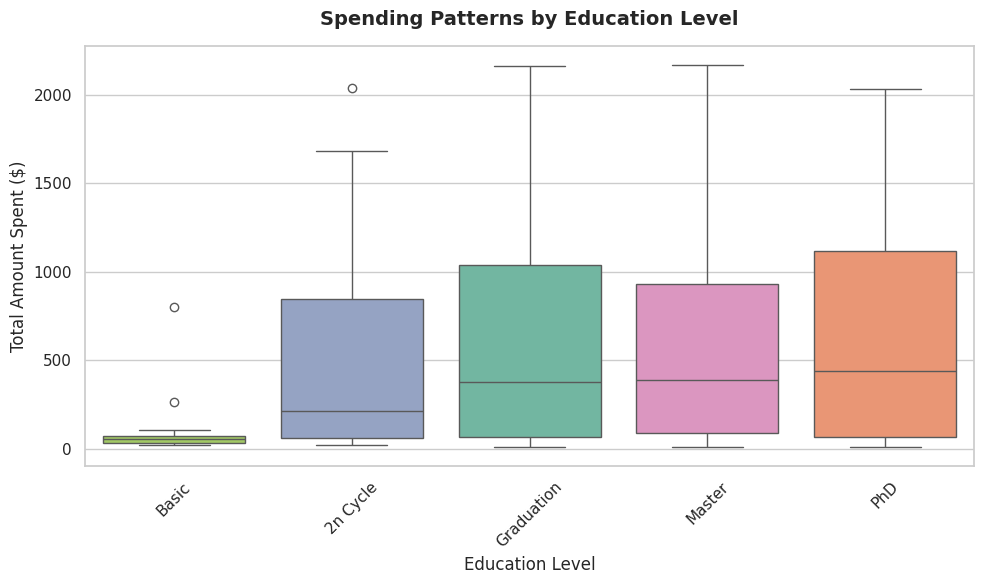

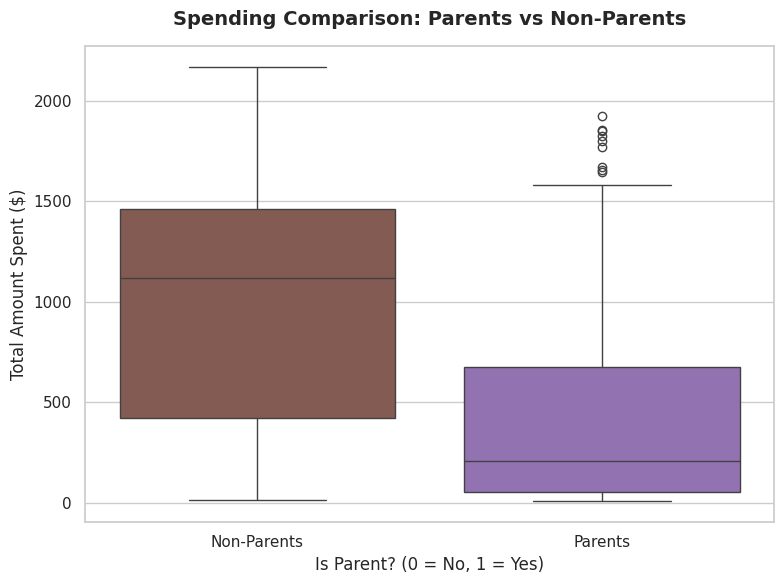

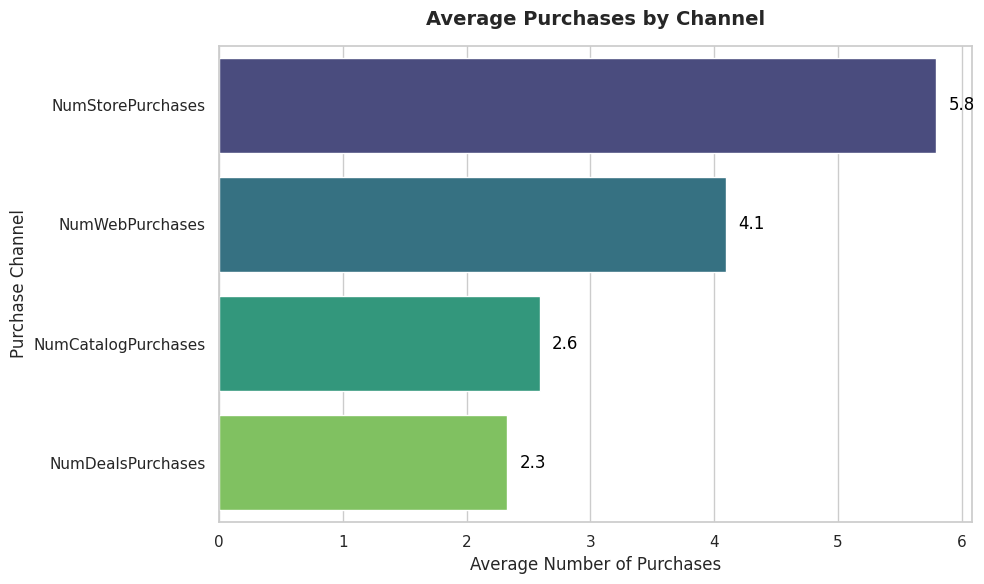

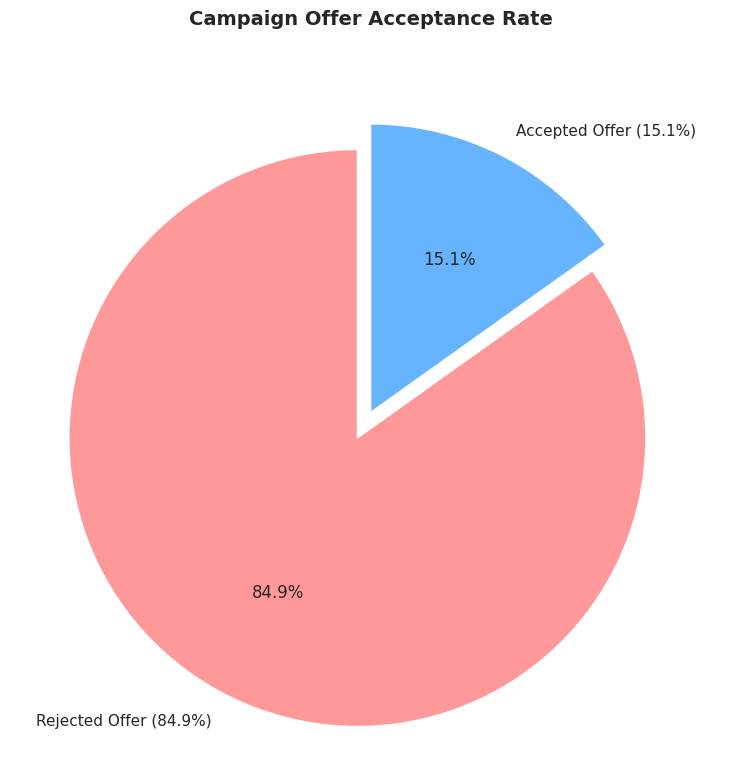

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Load the clustered dataset
df = pd.read_csv("clustered_customer_segments.csv")

# Set style for all visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 12
palette = {"Premium": "#FF7F0E", "Mid-tier": "#1F77B4", "Budget": "#2CA02C"}

## --------------------------
## 1. Customer Segmentation Visualization
## --------------------------
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df,
    x='Income',
    y='Total_Spent',
    hue='Segment',
    palette=palette,
    alpha=0.7,
    s=100
)

# Add annotations
plt.annotate('Premium Customers\n(High Income, High Spending)',
             xy=(80000, 1500), xytext=(60000, 2000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate('Budget Customers\n(Lower Income, Minimal Spending)',
             xy=(30000, 100), xytext=(10000, 500),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle="round", fc="w"))

plt.title("Customer Segmentation by Income vs Total Spending", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Yearly Household Income ($)")
plt.ylabel("Total Amount Spent ($)")
plt.legend(title="Customer Segment")
plt.tight_layout()
plt.savefig('segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

## --------------------------
## 2. Education Level vs Spending (FIXED)
## --------------------------
plt.figure(figsize=(10, 6))
order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
ax = sns.boxplot(
    data=df,
    x='Education',
    y='Total_Spent',
    order=order,
    hue='Education',  # Fixes FutureWarning
    palette='Set2',
    legend=False  # Hide redundant legend
)

plt.title("Spending Patterns by Education Level", pad=15, fontsize=14, fontweight='bold')
plt.xlabel("Education Level")
plt.ylabel("Total Amount Spent ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('education_spending.png', dpi=300)
plt.show()

## --------------------------
## 3. Parental Status Impact (FIXED)
## --------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Is_Parent',
    y='Total_Spent',
    hue='Is_Parent',  # Fixes FutureWarning
    palette={0: '#8c564b', 1: '#9467bd'},
    legend=False  # Hide redundant legend
)

plt.title("Spending Comparison: Parents vs Non-Parents", pad=15, fontsize=14, fontweight='bold')
plt.xlabel("Is Parent? (0 = No, 1 = Yes)")
plt.ylabel("Total Amount Spent ($)")
plt.xticks([0, 1], ['Non-Parents', 'Parents'])
plt.tight_layout()
plt.savefig('parent_spending.png', dpi=300)
plt.show()

## --------------------------
## 4. Purchase Channel Analysis
## --------------------------
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
purchase_means = df[purchase_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x=purchase_means.values,
    y=purchase_means.index,
    hue=purchase_means.index,  # Fixes FutureWarning
    palette='viridis',
    legend=False
)

# Add value labels
for i, v in enumerate(purchase_means.values):
    plt.text(v + 0.1, i, f"{v:.1f}", color='black', ha='left', va='center')

plt.title("Average Purchases by Channel", pad=15, fontsize=14, fontweight='bold')
plt.xlabel("Average Number of Purchases")
plt.ylabel("Purchase Channel")
plt.tight_layout()
plt.savefig('purchase_channels.png', dpi=300)
plt.show()

## --------------------------
## 5. Campaign Response Rate
## --------------------------
response_counts = df['Response'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(
    response_counts,
    labels=['Rejected Offer (84.9%)', 'Accepted Offer (15.1%)'],
    colors=['#ff9999','#66b3ff'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0)
)

plt.title("Campaign Offer Acceptance Rate", pad=20, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('response_rate.png', dpi=300)
plt.show()





 **Customer Behavior Analysis - Key Recommendations**

 1. Segment-Specific Strategies
- **Premium Customers (28%):**
  - Offer exclusive products and VIP services
  - Implement loyalty rewards program
  - Personalize high-touch engagements

- **Mid-Tier Customers (26%):**
  - Bundle complementary products
  - Introduce subscription options
  - Target with moderate premium offers

- **Budget Customers (47%):**
  - Focus on value packs and discounts
  - Highlight price-sensitive benefits
  - Use deals and promotions strategically

 2. Education-Based Targeting
- PhD/Graduates: Premium content and research-backed products
- Basic Education: Simplified messaging and affordable options

3. Parent-Focused Campaigns
- Family bundles and bulk discounts
- Child-friendly product recommendations
- Time-saving solutions for parents

4. Channel Optimization
- Improve web store conversion with:
  - Better product recommendations
  - Streamlined checkout process
- Increase catalog engagement through:
  - Targeted mailers
  - QR code integration

5. Boost Offer Acceptance
  - A/B test different incentive types
  - Personalize offers based on:
    - Past purchase behavior
    - Customer lifetime value
- Implement win-back campaigns for:
  - High recency, low spending customers


Key Findings

- Customer Demographics:

    - Average age: 56 years, with most customers aged 40-60.

    - Education levels: Majority are graduates (51.9%), followed by PhD holders (20.6%).

    - Marital status: Mostly married (38.2%) or in a relationship (25.9%).

        Income distribution is right-skewed, with a mean of $51,409.

- Spending Behavior:

    - Higher income correlates strongly with higher spending.

    - Non-parents spend more than parents.

    - PhD holders and graduates spend the most, while basic education holders spend the least.

- Purchase Channels:

    - Most purchases occur in stores (5.8 avg), followed by web purchases (4.1 avg).

    - Catalog and deal purchases are less frequent.

- Campaign Response:

    -  Only 15.1% of customers accepted the campaign offer.

- Customer Segments:

    - Premium (28%): High income, high spending. Target with exclusive offers.

    - Mid-tier (26%): Moderate income and spending. Offer bundles and subscriptions.

    - Budget (47%): Lower income, minimal spending. Focus on discounts and value packs.

Additional Recommendations

  - Personalized Marketing:

      - Use data-driven insights to tailor campaigns. For example:

      - Send wine recommendations to high spenders on wines.

      - Offer family bundles to parents.

  - Dynamic Pricing:

      - Implement tiered pricing based on customer segments. For example:

      - Premium customers could receive early access to sales.

      - Budget customers could get flash discounts.

  - Enhance Digital Presence:

      - Improve the website and mobile app to boost web purchases, as this channel has growth potential.

      - Use retargeting ads for customers who visit the website but do not purchase.

  - Loyalty Programs:

      - Introduce a points-based loyalty program to incentivize repeat purchases, especially for mid-tier customers.

      - Offer exclusive benefits to premium customers, such as free shipping or personalized services.

  - Feedback Mechanism:

      - Collect feedback from customers who rejected the campaign offer to understand their reasons and refine future campaigns.

  - Seasonal Campaigns:

      - Launch seasonal promotions (e.g., holidays, festivals) to attract budget customers and increase sales volume.

  - Referral Programs:

      - Encourage existing customers to refer friends and family by offering discounts or rewards, leveraging the social nature of married/together customers.

Conclusion

The analysis reveals distinct customer segments with unique behaviors and preferences. By leveraging these insights, the company can optimize its marketing efforts to increase offer acceptance rates and overall revenue. Key strategies include segment-specific campaigns, personalized offers, and enhancing digital channels. Implementing these recommendations will help the company better target its audience, improve customer engagement, and drive sales growth.

Final Thought

Data-driven decision-making is crucial in modern marketing. This project demonstrates how statistical analysis and customer segmentation can uncover actionable insights, enabling businesses to tailor their strategies effectively. Continued monitoring and adaptation of these strategies will ensure sustained success in a competitive market.